In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

In [2]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [3]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [5]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,Casino Royale: James Bond 007 (Vintage),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [6]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,The Five Greatest Warriors (Jack West Series),Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [9]:
q1 = train.Price.quantile(0.25)
q3 = train.Price.quantile(0.75)
iqr = q3-q1
upper = q3+12*iqr
lower = q1-12*iqr
x = np.where((train.Price < lower )| (train.Price.values>upper))
train.drop(index = x[0], inplace=True)
train.reset_index(drop=True, inplace=True)

In [10]:
def words(text):
    return(len(str(text).lower().split())/len(str(text)))

def letter(text):
    return(len(str(text)))

def n_stopwords(text):
    s = [w for w in str(text).lower().split() if w in stopwords]
    return(len(s)/len(str(text)))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s)/len(str(text)))

def n_title(text):
    s = [w for w in str(text).lower().split() if w.istitle()]
    return(len(s)/len(str(text)))

def n_Upper(text):
    s = [w for w in str(text).lower().split() if w.isupper()]
    return(len(s)/len(str(text)))

def n_Lower(text):
    s = [w for w in str(text).lower().split() if w.islower()]
    return(len(s)/len(str(text)))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Genre_char'] = train.Genre.apply(lambda x: letter(x))
test['Genre_char'] = test.Genre.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Title_upper_word'] = train.Title.apply(lambda x: n_Upper(x))
test['Title_upper_word'] = test.Title.apply(lambda x: n_Upper(x))

train['Synopsis_upper_word'] = train.Synopsis.apply(lambda x: n_Upper(x))
test['Synopsis_upper_word'] = test.Synopsis.apply(lambda x: n_Upper(x))

train['Title_lower_word'] = train.Title.apply(lambda x: n_Lower(x))
test['Title_lower_word'] = test.Title.apply(lambda x: n_Lower(x))

train['Synopsis_lower_word'] = train.Synopsis.apply(lambda x: n_Lower(x))
test['Synopsis_lower_word'] = test.Synopsis.apply(lambda x: n_Lower(x))

#train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
#train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

#test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
#test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]

#train['Title_0'] = train.Title_0.apply(lambda x: words(x))
#test['Title_0'] = test.Title_0.apply(lambda x: words(x))

#train['Title_1'] = train.Title_1.apply(lambda x: words(x))
#test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [11]:
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train.Author = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test.Author = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [12]:
train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

In [13]:
train.Date.fillna(2014, inplace=True)
test.Date.fillna(2014, inplace=True)

In [16]:
train.Edition.str.extract(r'(^[a-zA-Z]*),.*')[0].value_counts()

Paperback     5184
Hardcover      807
Flexibound      15
Cards            8
Name: 0, dtype: int64

In [17]:
train['Edition_1'] = train.Edition.str.extract(r'(^[a-zA-Z]*),.*')
test['Edition_1'] = test.Edition.str.extract(r'(^[a-zA-Z]*),.*')

In [40]:
train['Edition_2'] = train.Edition.str.extract(r'^.* -*(.*),.*')
test['Edition_2'] = test.Edition.str.extract(r'^.* -*(.*),.*')

In [43]:
train.Edition_2.fillna('other', inplace=True)
test.Edition_2.fillna('other', inplace=True)

In [44]:
t = set(train.Edition_2.value_counts().index).difference(set(test.Edition_2.value_counts().index))
train.Edition_2 = train.Edition_2.apply(lambda x: np.NaN if x in list(t) else x)

In [45]:
train.Edition_2.fillna('other', inplace=True)
test.Edition_2.fillna('other', inplace=True)

In [49]:
train.Edition_1.fillna('Paperback', inplace=True)

In [51]:
train.dropna(inplace=True)
train.reset_index(drop=True, inplace=True)

In [52]:
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")

In [53]:
train['Rating_t'] = train.Reviews.str.extract(r"(^\d*)")
test['Rating_t'] = test.Reviews.str.extract(r"(^\d*)")

In [54]:
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

#train['Rat_Rev'] = train['Rat_Rev'].apply(lambda x: x/5)
#test['Rat_Rev'] = test['Rat_Rev'].apply(lambda x: x/5)

In [55]:
train.Genre.value_counts()

Action & Adventure (Books)               946
Romance (Books)                          418
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Radiological & Ultrasound Technology       1
Economic Conditions                        1
Nuclear Engineering                        1
Travel with Pets                           1
Baseball (Books)                           1
Name: Genre, Length: 344, dtype: int64

In [56]:
test.Genre.value_counts()

Action & Adventure (Books)               236
Romance (Books)                           98
Biographies & Autobiographies (Books)     90
Contemporary Fiction (Books)              69
Crime, Thriller & Mystery (Books)         59
                                        ... 
Teaching & Education                       1
C# Programming                             1
Industrial Engineering                     1
Constitutional Law                         1
Public Policy                              1
Name: Genre, Length: 225, dtype: int64

In [57]:
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [58]:
train.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Title_count,...,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Date,Edition_1,Edition_2,Review_t,Rating_t,Rat_Rev,Genre_t
0,The Prisoner's Gold (The Hunters 3),other,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,0.171429,...,0.0,0.142857,0.165613,2016,Paperback,other,4.0,4,16.0,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0.205882,...,0.0,0.205882,0.158813,2012,Paperback,other,3.9,3,11.7,Cinema & Broadcast (Books)


In [59]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tfidf = TfidfVectorizer(1,3)
x = tfidf.fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,4))
z = tfidf.fit_transform(pd.concat([train.Title, test.Title], axis = 0))

tfidf = TfidfVectorizer(ngram_range=(1,4))
e = tfidf.fit_transform(pd.concat([train.Genre_t, test.Genre_t], axis = 0))

In [60]:
#x = CountVectorizer().fit_transform(pd.concat([train.Synopsis, test.Synopsis], axis = 0))

In [61]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=80)
x = pd.DataFrame(pca.fit_transform(x), columns = [a for a in range(80)])
z = pd.DataFrame(pca.fit_transform(z), columns = [a for a in range(80,160)])
e = pd.DataFrame(pca.fit_transform(e), columns = [a for a in range(160,240)])

In [62]:
np.sum(pca.explained_variance_ratio_)

0.8933249825274967

In [63]:
train.shape, test.shape

((6211, 31), (1560, 30))

In [64]:
tr = x.iloc[:6211,:]
te = x.iloc[6211:,:]
te.reset_index(drop = True, inplace=True)

tr_z = z.iloc[:6211,:]
te_z = z.iloc[6211:,:]
te_z.reset_index(drop = True, inplace=True)

tr_e = e.iloc[:6211,:]
te_e = e.iloc[6211:,:]
te_e.reset_index(drop = True, inplace=True)

In [65]:
train = pd.concat([train, tr, tr_z, tr_e], axis = 1)
test = pd.concat([test, te, te_z, te_e], axis = 1)

In [66]:
train.reset_index(drop = True, inplace=True)
train.shape, test.shape

((6211, 271), (1560, 270))

In [67]:
train.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [68]:
(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6211 entries, 0 to 6210
Columns: 265 entries, Author to 239
dtypes: float64(254), int64(3), object(8)
memory usage: 12.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 264 entries, Author to 239
dtypes: float64(253), int64(3), object(8)
memory usage: 3.1+ MB


(None, None)

In [69]:
train.Author = train.Author.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_1 = train.Edition_1.astype('category')
train.Edition_2 = train.Edition_2.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')


test.Author = test.Author.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_1 = test.Edition_1.astype('category')
test.Edition_2 = test.Edition_2.astype('category')
test.Genre_t = test.Genre_t.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')

train.Date = train.Date.apply(lambda x: 2019-int(x))
test.Date = test.Date.apply(lambda x: 2019-int(x))

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6211 entries, 0 to 6210
Columns: 265 entries, Author to 239
dtypes: category(5), float64(256), int64(4)
memory usage: 12.4 MB


In [71]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [72]:
train.shape, test.shape

((6211, 264), (1560, 264))

3.2902942073094117 14.784176384397412


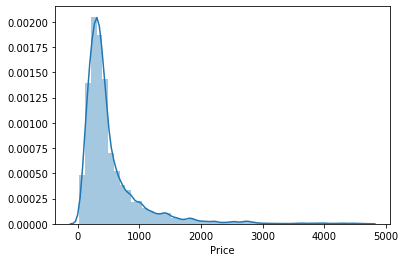

In [73]:
sns.distplot(train_label)
print(train_label.skew(), train_label.kurt())

0.28104548357648684 0.5994262290146954


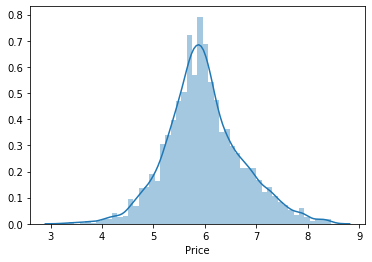

In [74]:
sns.distplot(np.log1p(train_label))
print(np.log1p(train_label).skew(), np.log1p(train_label).kurt())

In [75]:
train_label = train_label.apply(lambda x: np.log1p(x))

df = pd.DataFrame(pd.concat([train[c], test[c]], axis = 0), columns =train.columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].ftype == 'category:dense' :
        df[c] = le.fit_transform(pd.concat([train[c], test[c]], axis = 0))
    else :
        df[c] = pd.concat([train[c], test[c]], axis = 0)

In [76]:
pd.set_option('max_column',200)
train.head()

,Author,BookCategory,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Genre_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Date,Edition_1,Edition_2,Review_t,Rating_t,Rat_Rev,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239
0,other,Action & Adventure,0.171429,0.165613,35,791,26,0.028571,0.069532,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.165613,3,Paperback,other,4.0,4.0,16.0,Action & Adventure (Books),0.227464,0.037363,-0.024436,-0.064600,0.022960,0.073589,-0.040199,0.049763,0.041847,-0.004012,-0.030316,-0.006089,0.009966,-0.001116,-0.012574,0.012016,0.018275,-0.038705,0.027630,0.034399,-0.052348,-0.009817,-0.006511,0.017798,0.007915,-0.019578,-0.038199,-0.043448,0.019467,0.021136,-0.013205,-0.009346,0.006119,-0.002439,-0.007421,-0.034810,0.032805,0.003042,0.008219,-0.005155,-0.010775,-0.007172,0.022295,0.039517,0.001167,-0.034152,0.005127,-0.013147,0.007520,-0.041746,-0.000764,0.008706,-0.019246,-0.000108,-0.033223,-0.001073,-0.019942,-0.022475,-0.039692,0.006672,0.009716,0.012625,-0.015456,0.031310,-0.022042,-0.004587,-0.030763,0.017686,0.050659,-0.031948,-0.001915,-0.025545,0.005631,0.009112,-0.014666,0.027880,...,0.000089,-0.003121,0.001497,-0.009406,0.002780,-1.219121e-03,0.003748,0.003739,0.002914,-0.000934,-0.002482,0.002449,0.004926,0.000552,-0.003746,-0.002688,-0.000767,-0.005170,0.000927,-0.006097,9.988682e-01,-4.369024e-02,-9.860243e-03,-1.197337e-02,-2.757200e-03,-3.189600e-03,1.024438e-11,4.969802e-03,-5.163847e-03,-4.398030e-03,7.627413e-05,-1.532770e-03,-1.784669e-03,-6.929396e-09,-1.788907e-03,-1.041800e-03,-1.281740e-03,1.297058e-04,-2.731315e-04,-1.341472e-03,-8.287094e-04,-4.948550e-06,-2.185162e-04,-1.132821e-04,-4.627390e-04,-0.000871,0.000053,-0.000695,-0.000539,0.001206,-0.000713,0.000064,-0.000438,-6.204615e-06,-0.000412,-0.000637,-0.001065,0.000668,-0.000006,-0.000154,-0.000289,-0.000149,-0.000171,-0.000169,-0.000514,-0.000088,-0.000206,0.000014,-0.000464,-0.000334,0.000016,-0.000292,0.000002,0.000003,-0.000406,-0.000001,-0.000086,-0.000809,-0.000213,-2.990474e-08,4.638657e-07,-0.000142,-0.000029,-0.000091,-0.000047,0.000064,-0.000059,-0.000180,-0.000101,-0.000252,0.000001,0.000030,0.000040,-0.000181,-0.000037,-0.000013,0.000011,-0.000062,-0.000063,0.000070
1,Arun Khopkar,"Biographies, Diaries & True Accounts",0.205882,0.159686,34,1146,26,0.058824,0.055846,0.0,0.0,0.0,0.0,0.0,0.0,0.205882,0.158813,7,Paperback,other,3.9,3.0,11.7,Cinema & Broadcast (Books),0.199141,-0.019163,-0.057285,0.027007,0.021219,-0.043759,-0.013572,-0.017365,-0.028226,0.051514,0.013310,0.041226,-0.003525,0.046389,0.018288,-0.013784,-0.027670,0.032637,0.015563,0.014149,-0.038720,0.026356,0.013393,-0.002543,-0.015519,-0.005341,-0.011554,-0.022115,-0.018716,-0.011785,0.000527,-0.016072,0.037635,0.018947,-0.019197,-0.004001,0.029605,-0.035656,-0.044330,0.007926,0.028687,0.004047,0.009150,0.062199,0.018659,-0.014036,-0.002702,0.002109,0.032108,0.075105,-0.056087,0.003086,-0.036871,0.018333,-0.002539,0.042565,-0.024080,-0.017481,0.007829,-0.016478,0.019979,-0.032752,-0.012430,0.032638,0.023667,-0.009638,0.045830,-0.011654,-0.009616,0.026763,0.074016,-0.009582,0.016789,-0.021283,0.033287,0.025075,...,0.001187,-0.004090,-0.005640,0.007407,-0.002851,2.592902e-07,0.000565,0.001084,-0.000515,0.012177,-0.006432,0.002602,0.010212,0.001516,-0.013

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.concat([train,test], axis = 0)
df.Author = le.fit_transform(df.Author)
df.Genre_t = le.fit_transform(df.Genre_t)
train.shape, test.shape

((6211, 264), (1560, 264))

In [78]:
train = df.iloc[:6211,:]
test = df.iloc[6211:,:]
test.reset_index(drop=True, inplace=True)

In [79]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6211, 287) (1560, 287)


In [80]:
train.head()

,Author,Title_count,Synopsis_count,Title_count_char,Synopsis_count_char,Genre_char,Title_n_st,Synopsis_n_st,Title_n_punct,Synopsis_n_punct,Title_title_word,Synopsis_title_word,Title_upper_word,Synopsis_upper_word,Title_lower_word,Synopsis_lower_word,Date,Review_t,Rating_t,Rat_Rev,Genre_t,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,...,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,"BookCategory_Arts, Film & Photography","BookCategory_Biographies, Diaries & True Accounts",BookCategory_Comics & Mangas,"BookCategory_Computing, Internet & Digital Media","BookCategory_Crime, Thriller & Mystery",BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Edition_1_Flexibound,Edition_1_Hardcover,Edition_1_Paperback,Edition_2_Audiobook,Edition_2_Edge,Edition_2_Edition,Edition_2_Illustrated,Edition_2_Import,Edition_2_Leaf,Edition_2_Paperback,Edition_2_Print,Edition_2_Unabridged,Edition_2_eBook,Edition_2_music,Edition_2_other,Edition_2_set
0,529,0.171429,0.165613,35,791,26,0.028571,0.069532,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.165613,3,4.0,4.0,16.0,1,0.227464,0.037363,-0.024436,-0.064600,0.022960,0.073589,-0.040199,0.049763,0.041847,-0.004012,-0.030316,-0.006089,0.009966,-0.001116,-0.012574,0.012016,0.018275,-0.038705,0.027630,0.034399,-0.052348,-0.009817,-0.006511,0.017798,0.007915,-0.019578,-0.038199,-0.043448,0.019467,0.021136,-0.013205,-0.009346,0.006119,-0.002439,-0.007421,-0.034810,0.032805,0.003042,0.008219,-0.005155,-0.010775,-0.007172,0.022295,0.039517,0.001167,-0.034152,0.005127,-0.013147,0.007520,-0.041746,-0.000764,0.008706,-0.019246,-0.000108,-0.033223,-0.001073,-0.019942,-0.022475,-0.039692,0.006672,0.009716,0.012625,-0.015456,0.031310,-0.022042,-0.004587,-0.030763,0.017686,0.050659,-0.031948,-0.001915,-0.025545,0.005631,0.009112,-0.014666,0.027880,0.008164,0.020493,-0.035205,...,1.024438e-11,4.969802e-03,-5.163847e-03,-4.398030e-03,7.627413e-05,-1.532770e-03,-1.784669e-03,-6.929396e-09,-1.788907e-03,-1.041800e-03,-1.281740e-03,1.297058e-04,-2.731315e-04,-1.341472e-03,-8.287094e-04,-4.948550e-06,-2.185162e-04,-1.132821e-04,-4.627390e-04,-0.000871,0.000053,-0.000695,-0.000539,0.001206,-0.000713,0.000064,-0.000438,-6.204615e-06,-0.000412,-0.000637,-0.001065,0.000668,-0.000006,-0.000154,-0.000289,-0.000149,-0.000171,-0.000169,-0.000514,-0.000088,-0.000206,0.000014,-0.000464,-0.000334,0.000016,-0.000292,0.000002,0.000003,-0.000406,-0.000001,-0.000086,-0.000809,-0.000213,-2.990474e-08,4.638657e-07,-0.000142,-0.000029,-0.000091,-0.000047,0.000064,-0.000059,-0.000180,-0.000101,-0.000252,0.000001,0.000030,0.000040,-0.000181,-0.000037,-0.000013,0.000011,-0.000062,-0.000063,0.000070,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,36,0.205882,0.159686,34,1146,26,0.058824,0.055846,0.0,0.0,0.0,0.0,0.0,0.0,0.205882,0.158813,7,3.9,3.0,11.7,49,0.199141,-0.019163,-0.057285,0.027007,0.021219,-0.043759,-0.013572,-0.017365,-0.028226,0.051514,0.013310,0.041226,-0.003525,0.046389,0.018288,-0.013784,-0.027670,0.032637,0.015563,0.014149,-0.038720,0.026356,0.013393,-0.002543,-0.015519,-0.005341,-0.011554,-0.022115,-0.018716,-0.011785,0.000527,-0.016072,0.037635,0.018947,-0.019197,-0.004001,0.029605,-0.035656,-0.044330,0.007926,0.028687,0.004047,0.009150,0.062199,0.018659,-0.014036,-0.002702,0.002109,0.032108,0.075105,-0.056087,0.003086,-0.036871,0.018333,-0.002539,0.042565,-0.024080,-0.017481,0.007829,-0.016478,0.019979,-0.032752,-0.012430,0.032638,0.023667,-0.009638,0.045830,-0.011654,-0.009616,0.026763,0.074016,-0.009582,0.016789,-0.021283,0.033287,

In [81]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

In [82]:
#from sklearn.preprocessing import MinMaxScaler
#mmx = MinMaxScaler()
#train = pd.DataFrame(mmx.fit_transform(train), columns = train.columns)
#test = pd.DataFrame(mmx.fit_transform(test), columns = test.columns)

In [83]:
train.shape, test.shape

((6211, 287), (1560, 287))

# ML

In [84]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [85]:
score = cross_val_score(xgb.XGBRegressor(), train, train_label, scoring='neg_mean_squared_error', cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:13:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:13:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:13:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [86]:
score

array([-0.30692398, -0.27778221, -0.31945005])

In [87]:
param_xgb = {}
param_xgb['learning_rate'] = 0.08
param_xgb['seed'] = 87
param_xgb['eval_metric'] = 'rmse'
param_xgb['objective'] = 'reg:linear'

param_lgb = {}
param_lgb['objective'] = 'regression'
param_lgb['learning_rate'] = 0.03
param_lgb['seed'] = 93
param_lgb['metric'] = 'rmse'

def func(train, train_label, test, name):
    pred = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 3)))
    pred.columns = [a for a in range(3)]
    
    pred_test = pd.DataFrame(data = np.zeros(shape = (test.shape[0], 3)))
    pred_test.columns = [a for a in range(3)]
    
    k = KFold(n_splits=3, shuffle=True, random_state=913)
    i = 0
    for t_index, v_index in k.split(train_label.ravel()):
        xtrain , ytrain = train.loc[t_index,:], train_label[t_index]
        xtest , ytest = train.loc[v_index,:], train_label[v_index]
        if(name == 'lgb'):
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest)
            best = lgb.train(param_lgb , trainset, valid_sets=[trainset,testset], num_boost_round=10000,
                             early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(xtest, best_iteration = best.best_iteration)
            
            pred_test.loc[:,i] = best.predict(test, best_iteration = best.best_iteration)
            i = i +1
            
        else : 
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest,label=ytest)
            t = xgb.DMatrix(test)
            best = xgb.train(list(param_xgb.items()) ,trainset, evals=[(trainset, 'train'),(testset,'test')],
                    num_boost_round=10000, early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(testset, ntree_limit = best.best_ntree_limit)
            
            pred_test.loc[:,i] = best.predict(t, ntree_limit = best.best_ntree_limit)
            i = i +1
    
    return(pred,pred_test,best)

In [88]:
train_xgb, test_xgb, model = func(train,train_label, test, 'xgb')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:14:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5.08817	test-rmse:5.11466
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.68857	test-rmse:4.71507
[2]	train-rmse:4.32118	test-rmse:4.34676
[3]	train-rmse:3.98352	test-rmse:4.00843
[4]	train-rmse:3.67298	test-rmse:3.69834
[5]	train-rmse:3.38785	test-rmse:3.41455
[6]	train-rmse:3.12581	test-rmse:3.15363
[7]	train-rmse:2.88491	test-rmse:2.91416
[8]	train-rmse:2.66398	test-rmse:2.69522
[9]	train-rmse:2.46105	test-rmse:2.4932
[10]	train-rmse:2.27479	test-rmse:2.3091
[11]	train-rmse:2.10381	test-rmse:2.14081
[12]	train-rmse:1.94684	test-rmse:1.98626
[13]	train-rmse:1.803	test-rmse:1.84499
[14]	train-rmse:1.67132	test-rmse:1.71647
[15]	train-rmse:1.55058	test-rmse:1.59892
[16]	train-rmse:1.44011	test-rmse:1.49102
[17]	train-rmse:1.33892	test-rmse:1.394


[181]	train-rmse:0.150475	test-rmse:0.541164
[182]	train-rmse:0.149203	test-rmse:0.541099
[183]	train-rmse:0.148184	test-rmse:0.540987
[184]	train-rmse:0.147395	test-rmse:0.540979
[185]	train-rmse:0.146856	test-rmse:0.541024
[186]	train-rmse:0.146086	test-rmse:0.541056
[187]	train-rmse:0.144984	test-rmse:0.540968
[188]	train-rmse:0.143926	test-rmse:0.540896
[189]	train-rmse:0.142796	test-rmse:0.540856
[190]	train-rmse:0.142178	test-rmse:0.540846
[191]	train-rmse:0.141535	test-rmse:0.540713
[192]	train-rmse:0.141189	test-rmse:0.54071
[193]	train-rmse:0.140451	test-rmse:0.540636
[194]	train-rmse:0.139308	test-rmse:0.540681
[195]	train-rmse:0.138683	test-rmse:0.540612
[196]	train-rmse:0.138218	test-rmse:0.540661
[197]	train-rmse:0.137581	test-rmse:0.540612
[198]	train-rmse:0.137035	test-rmse:0.540621
[199]	train-rmse:0.136426	test-rmse:0.540601
[200]	train-rmse:0.135104	test-rmse:0.540499
[201]	train-rmse:0.13466	test-rmse:0.540485
[202]	train-rmse:0.134007	test-rmse:0.540472
[203]	train-

[364]	train-rmse:0.056023	test-rmse:0.538934
[365]	train-rmse:0.055636	test-rmse:0.538891
[366]	train-rmse:0.055209	test-rmse:0.538911
[367]	train-rmse:0.054954	test-rmse:0.53893
[368]	train-rmse:0.054767	test-rmse:0.538942
[369]	train-rmse:0.054602	test-rmse:0.53892
[370]	train-rmse:0.054225	test-rmse:0.538904
[371]	train-rmse:0.053859	test-rmse:0.538871
[372]	train-rmse:0.053636	test-rmse:0.538838
[373]	train-rmse:0.0535	test-rmse:0.53882
[374]	train-rmse:0.053328	test-rmse:0.538798
[375]	train-rmse:0.053156	test-rmse:0.538789
[376]	train-rmse:0.052915	test-rmse:0.538755
[377]	train-rmse:0.05272	test-rmse:0.538755
[378]	train-rmse:0.052452	test-rmse:0.538738
[379]	train-rmse:0.052362	test-rmse:0.538735
[380]	train-rmse:0.052183	test-rmse:0.538728
[381]	train-rmse:0.051978	test-rmse:0.538687
[382]	train-rmse:0.051854	test-rmse:0.538699
[383]	train-rmse:0.051528	test-rmse:0.538609
[384]	train-rmse:0.051493	test-rmse:0.5386
[385]	train-rmse:0.051319	test-rmse:0.538613
[386]	train-rmse:0

[548]	train-rmse:0.030617	test-rmse:0.53832
[549]	train-rmse:0.03055	test-rmse:0.538331
[550]	train-rmse:0.030434	test-rmse:0.538319
[551]	train-rmse:0.030413	test-rmse:0.538313
[552]	train-rmse:0.030364	test-rmse:0.538319
[553]	train-rmse:0.030276	test-rmse:0.53832
[554]	train-rmse:0.030232	test-rmse:0.538327
[555]	train-rmse:0.030157	test-rmse:0.538323
[556]	train-rmse:0.030124	test-rmse:0.538323
[557]	train-rmse:0.03007	test-rmse:0.538316
[558]	train-rmse:0.030043	test-rmse:0.538317
[559]	train-rmse:0.030024	test-rmse:0.538319
[560]	train-rmse:0.029945	test-rmse:0.538325
[561]	train-rmse:0.02989	test-rmse:0.538325
[562]	train-rmse:0.029815	test-rmse:0.538329
[563]	train-rmse:0.029783	test-rmse:0.538333
[564]	train-rmse:0.029707	test-rmse:0.538312
[565]	train-rmse:0.029671	test-rmse:0.538311
[566]	train-rmse:0.029634	test-rmse:0.538305
[567]	train-rmse:0.029527	test-rmse:0.538323
[568]	train-rmse:0.029465	test-rmse:0.538328
[569]	train-rmse:0.029369	test-rmse:0.538336
[570]	train-rms

[731]	train-rmse:0.022802	test-rmse:0.538205
[732]	train-rmse:0.022779	test-rmse:0.538208
[733]	train-rmse:0.022766	test-rmse:0.538209
[734]	train-rmse:0.022742	test-rmse:0.538214
[735]	train-rmse:0.02273	test-rmse:0.538216
[736]	train-rmse:0.022709	test-rmse:0.538218
[737]	train-rmse:0.022663	test-rmse:0.538217
[738]	train-rmse:0.022625	test-rmse:0.538211
[739]	train-rmse:0.022586	test-rmse:0.538212
[740]	train-rmse:0.022542	test-rmse:0.538214
[741]	train-rmse:0.022488	test-rmse:0.538225
[742]	train-rmse:0.022461	test-rmse:0.53823
[743]	train-rmse:0.02243	test-rmse:0.538229
[744]	train-rmse:0.022401	test-rmse:0.538228
[745]	train-rmse:0.022386	test-rmse:0.538227
[746]	train-rmse:0.022371	test-rmse:0.53823
[747]	train-rmse:0.022357	test-rmse:0.538239
[748]	train-rmse:0.022347	test-rmse:0.538243
[749]	train-rmse:0.022335	test-rmse:0.538248
[750]	train-rmse:0.022323	test-rmse:0.538248
[751]	train-rmse:0.022301	test-rmse:0.538248
[752]	train-rmse:0.022279	test-rmse:0.538247
[753]	train-rm

[914]	train-rmse:0.019914	test-rmse:0.538185
[915]	train-rmse:0.019909	test-rmse:0.538185
[916]	train-rmse:0.019886	test-rmse:0.538183
[917]	train-rmse:0.019885	test-rmse:0.538184
[918]	train-rmse:0.019869	test-rmse:0.538184
[919]	train-rmse:0.019863	test-rmse:0.538185
[920]	train-rmse:0.019847	test-rmse:0.538189
[921]	train-rmse:0.01984	test-rmse:0.538189
[922]	train-rmse:0.019827	test-rmse:0.538188
[923]	train-rmse:0.019816	test-rmse:0.538188
Stopping. Best iteration:
[723]	train-rmse:0.02299	test-rmse:0.538175

[02:17:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5.09631	test-rmse:5.0975
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.69658	test-rmse:4.69804
[2]	train-rmse:4.32911	test-rmse:4.33017
[3]	train-rmse:3.99124	test-rmse:3.99133
[4]	train-rmse:3.68086	test-rmse:3.6811
[5]	train-rmse:3.

[170]	train-rmse:0.160876	test-rmse:0.499321
[171]	train-rmse:0.159969	test-rmse:0.499352
[172]	train-rmse:0.158948	test-rmse:0.499358
[173]	train-rmse:0.15762	test-rmse:0.499321
[174]	train-rmse:0.156257	test-rmse:0.499071
[175]	train-rmse:0.154996	test-rmse:0.499095
[176]	train-rmse:0.154616	test-rmse:0.499182
[177]	train-rmse:0.153458	test-rmse:0.499153
[178]	train-rmse:0.151747	test-rmse:0.499113
[179]	train-rmse:0.150525	test-rmse:0.498964
[180]	train-rmse:0.149628	test-rmse:0.498902
[181]	train-rmse:0.148567	test-rmse:0.498663
[182]	train-rmse:0.147462	test-rmse:0.498714
[183]	train-rmse:0.146774	test-rmse:0.498665
[184]	train-rmse:0.145724	test-rmse:0.498718
[185]	train-rmse:0.144695	test-rmse:0.498566
[186]	train-rmse:0.143653	test-rmse:0.49843
[187]	train-rmse:0.143289	test-rmse:0.49838
[188]	train-rmse:0.142278	test-rmse:0.498411
[189]	train-rmse:0.140685	test-rmse:0.498377
[190]	train-rmse:0.139622	test-rmse:0.498425
[191]	train-rmse:0.138541	test-rmse:0.498397
[192]	train-r

[353]	train-rmse:0.059422	test-rmse:0.495413
[354]	train-rmse:0.05935	test-rmse:0.495407
[355]	train-rmse:0.058936	test-rmse:0.495403
[356]	train-rmse:0.058488	test-rmse:0.495379
[357]	train-rmse:0.058227	test-rmse:0.495353
[358]	train-rmse:0.058016	test-rmse:0.495361
[359]	train-rmse:0.057816	test-rmse:0.495333
[360]	train-rmse:0.057532	test-rmse:0.495366
[361]	train-rmse:0.057195	test-rmse:0.495395
[362]	train-rmse:0.056835	test-rmse:0.495398
[363]	train-rmse:0.056621	test-rmse:0.49541
[364]	train-rmse:0.056369	test-rmse:0.495368
[365]	train-rmse:0.056236	test-rmse:0.495398
[366]	train-rmse:0.055902	test-rmse:0.495382
[367]	train-rmse:0.055688	test-rmse:0.495396
[368]	train-rmse:0.055461	test-rmse:0.495424
[369]	train-rmse:0.055225	test-rmse:0.495443
[370]	train-rmse:0.055111	test-rmse:0.495443
[371]	train-rmse:0.054711	test-rmse:0.495443
[372]	train-rmse:0.05455	test-rmse:0.495467
[373]	train-rmse:0.054279	test-rmse:0.49545
[374]	train-rmse:0.053967	test-rmse:0.495519
[375]	train-rm

[0]	train-rmse:5.10529	test-rmse:5.07944
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.70431	test-rmse:4.67944
[2]	train-rmse:4.33584	test-rmse:4.31221
[3]	train-rmse:3.9971	test-rmse:3.97587
[4]	train-rmse:3.6861	test-rmse:3.66653
[5]	train-rmse:3.40037	test-rmse:3.38186
[6]	train-rmse:3.13779	test-rmse:3.12156
[7]	train-rmse:2.89633	test-rmse:2.88252
[8]	train-rmse:2.67468	test-rmse:2.66315
[9]	train-rmse:2.47129	test-rmse:2.46226
[10]	train-rmse:2.28486	test-rmse:2.27766
[11]	train-rmse:2.11352	test-rmse:2.10935
[12]	train-rmse:1.95622	test-rmse:1.95475
[13]	train-rmse:1.8124	test-rmse:1.81426
[14]	train-rmse:1.68019	test-rmse:1.6852
[15]	train-rmse:1.55947	test-rmse:1.56763
[16]	train-rmse:1.44851	test-rmse:1.46111
[17]	train-rmse:1.34699	test-rmse:1.36354
[18]	train-rmse:1.25413	test-rmse:1.27563
[19]	train-rmse:1.16972	test-rmse:1.19557
[20]	train-rmse:1.0924	test-rm

[184]	train-rmse:0.148338	test-rmse:0.517372
[185]	train-rmse:0.147493	test-rmse:0.517301
[186]	train-rmse:0.146595	test-rmse:0.517228
[187]	train-rmse:0.145382	test-rmse:0.517153
[188]	train-rmse:0.14423	test-rmse:0.517068
[189]	train-rmse:0.142822	test-rmse:0.517005
[190]	train-rmse:0.142424	test-rmse:0.516824
[191]	train-rmse:0.141828	test-rmse:0.516723
[192]	train-rmse:0.140821	test-rmse:0.516599
[193]	train-rmse:0.139683	test-rmse:0.516474
[194]	train-rmse:0.138842	test-rmse:0.516349
[195]	train-rmse:0.13823	test-rmse:0.516294
[196]	train-rmse:0.137321	test-rmse:0.516323
[197]	train-rmse:0.136216	test-rmse:0.516011
[198]	train-rmse:0.135737	test-rmse:0.51599
[199]	train-rmse:0.135236	test-rmse:0.515887
[200]	train-rmse:0.133843	test-rmse:0.515911
[201]	train-rmse:0.132885	test-rmse:0.515905
[202]	train-rmse:0.131998	test-rmse:0.515835
[203]	train-rmse:0.13104	test-rmse:0.515747
[204]	train-rmse:0.130153	test-rmse:0.515719
[205]	train-rmse:0.129465	test-rmse:0.515707
[206]	train-rm

[368]	train-rmse:0.051399	test-rmse:0.513024
[369]	train-rmse:0.051318	test-rmse:0.513019
[370]	train-rmse:0.051251	test-rmse:0.513002
[371]	train-rmse:0.051078	test-rmse:0.512989
[372]	train-rmse:0.050909	test-rmse:0.512974
[373]	train-rmse:0.050605	test-rmse:0.512958
[374]	train-rmse:0.050221	test-rmse:0.51297
[375]	train-rmse:0.04988	test-rmse:0.512977
[376]	train-rmse:0.049479	test-rmse:0.512945
[377]	train-rmse:0.049054	test-rmse:0.51293
[378]	train-rmse:0.048842	test-rmse:0.51295
[379]	train-rmse:0.048617	test-rmse:0.512953
[380]	train-rmse:0.048403	test-rmse:0.512938
[381]	train-rmse:0.048166	test-rmse:0.512955
[382]	train-rmse:0.047912	test-rmse:0.512951
[383]	train-rmse:0.047741	test-rmse:0.512948
[384]	train-rmse:0.047484	test-rmse:0.512915
[385]	train-rmse:0.047178	test-rmse:0.512885
[386]	train-rmse:0.046886	test-rmse:0.512846
[387]	train-rmse:0.046567	test-rmse:0.512828
[388]	train-rmse:0.046417	test-rmse:0.512832
[389]	train-rmse:0.046159	test-rmse:0.512857
[390]	train-rm

[551]	train-rmse:0.026846	test-rmse:0.512469
[552]	train-rmse:0.026846	test-rmse:0.512469
[553]	train-rmse:0.026779	test-rmse:0.512471
[554]	train-rmse:0.026657	test-rmse:0.512468
[555]	train-rmse:0.026574	test-rmse:0.512475
[556]	train-rmse:0.026498	test-rmse:0.512462
[557]	train-rmse:0.026434	test-rmse:0.512457
[558]	train-rmse:0.026338	test-rmse:0.512469
[559]	train-rmse:0.02627	test-rmse:0.512475
[560]	train-rmse:0.026216	test-rmse:0.512472
[561]	train-rmse:0.026144	test-rmse:0.512478
[562]	train-rmse:0.026082	test-rmse:0.512492
[563]	train-rmse:0.026018	test-rmse:0.51249
[564]	train-rmse:0.025947	test-rmse:0.512489
[565]	train-rmse:0.025879	test-rmse:0.512479
[566]	train-rmse:0.025855	test-rmse:0.512482
[567]	train-rmse:0.025827	test-rmse:0.512471
[568]	train-rmse:0.025766	test-rmse:0.512477
[569]	train-rmse:0.025721	test-rmse:0.512474
[570]	train-rmse:0.025644	test-rmse:0.512463
[571]	train-rmse:0.025547	test-rmse:0.512482
[572]	train-rmse:0.025547	test-rmse:0.512482
[573]	train-

[736]	train-rmse:0.025422	test-rmse:0.51247
[737]	train-rmse:0.025422	test-rmse:0.51247
[738]	train-rmse:0.025422	test-rmse:0.51247
[739]	train-rmse:0.025422	test-rmse:0.51247
[740]	train-rmse:0.025422	test-rmse:0.51247
[741]	train-rmse:0.025422	test-rmse:0.51247
[742]	train-rmse:0.025422	test-rmse:0.51247
[743]	train-rmse:0.025422	test-rmse:0.51247
[744]	train-rmse:0.025422	test-rmse:0.51247
[745]	train-rmse:0.025422	test-rmse:0.51247
[746]	train-rmse:0.025422	test-rmse:0.51247
[747]	train-rmse:0.025422	test-rmse:0.51247
[748]	train-rmse:0.025422	test-rmse:0.51247
Stopping. Best iteration:
[548]	train-rmse:0.026894	test-rmse:0.512456



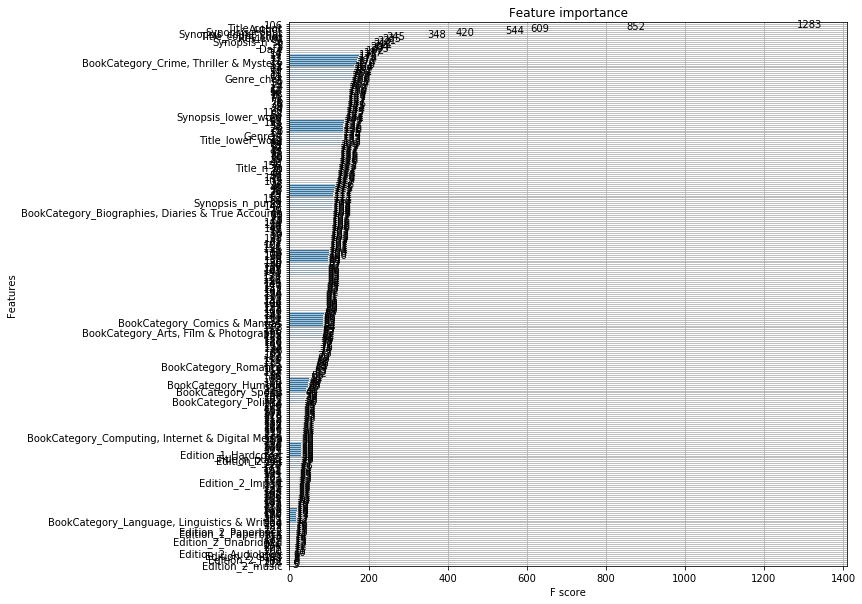

In [89]:
fig, ax  = plt.subplots(1,1, figsize=(10,10))
xgb.plot_importance(model, ax = ax)

In [90]:
train_lgb, test_lgb ,model = func(train,train_label,test,'lgb')

[1]	training's rmse: 0.727184	valid_1's rmse: 0.750507
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.719266	valid_1's rmse: 0.744272
[3]	training's rmse: 0.711808	valid_1's rmse: 0.738378
[4]	training's rmse: 0.704525	valid_1's rmse: 0.732719
[5]	training's rmse: 0.697519	valid_1's rmse: 0.727244
[6]	training's rmse: 0.690872	valid_1's rmse: 0.722485
[7]	training's rmse: 0.684463	valid_1's rmse: 0.717538
[8]	training's rmse: 0.678291	valid_1's rmse: 0.713033
[9]	training's rmse: 0.671994	valid_1's rmse: 0.708252
[10]	training's rmse: 0.666155	valid_1's rmse: 0.70404
[11]	training's rmse: 0.660179	valid_1's rmse: 0.700069
[12]	training's rmse: 0.654347	valid_1's rmse: 0.696133
[13]	training's rmse: 0.648807	valid_1's rmse: 0.692001
[14]	training's rmse: 0.643489	valid_1's rmse: 0.68828
[15]	training's rmse: 0.63818	valid_1's rmse: 0.684698
[16]	training's rmse: 0.63305	valid_1's rmse: 0.68135
[17]	training's rmse: 0.627919	valid_1's rmse: 0.677899

[148]	training's rmse: 0.352138	valid_1's rmse: 0.557628
[149]	training's rmse: 0.351128	valid_1's rmse: 0.557477
[150]	training's rmse: 0.350094	valid_1's rmse: 0.557337
[151]	training's rmse: 0.348992	valid_1's rmse: 0.557104
[152]	training's rmse: 0.347888	valid_1's rmse: 0.556846
[153]	training's rmse: 0.346942	valid_1's rmse: 0.556626
[154]	training's rmse: 0.345905	valid_1's rmse: 0.556295
[155]	training's rmse: 0.344765	valid_1's rmse: 0.556076
[156]	training's rmse: 0.343628	valid_1's rmse: 0.555738
[157]	training's rmse: 0.342616	valid_1's rmse: 0.555476
[158]	training's rmse: 0.34157	valid_1's rmse: 0.555414
[159]	training's rmse: 0.340487	valid_1's rmse: 0.555175
[160]	training's rmse: 0.339416	valid_1's rmse: 0.554932
[161]	training's rmse: 0.338401	valid_1's rmse: 0.554655
[162]	training's rmse: 0.337388	valid_1's rmse: 0.554429
[163]	training's rmse: 0.336333	valid_1's rmse: 0.554211
[164]	training's rmse: 0.335271	valid_1's rmse: 0.55386
[165]	training's rmse: 0.334208	v

[296]	training's rmse: 0.239246	valid_1's rmse: 0.538983
[297]	training's rmse: 0.238707	valid_1's rmse: 0.538983
[298]	training's rmse: 0.238056	valid_1's rmse: 0.538923
[299]	training's rmse: 0.237532	valid_1's rmse: 0.538787
[300]	training's rmse: 0.236926	valid_1's rmse: 0.538745
[301]	training's rmse: 0.236387	valid_1's rmse: 0.538716
[302]	training's rmse: 0.235919	valid_1's rmse: 0.538568
[303]	training's rmse: 0.235405	valid_1's rmse: 0.538452
[304]	training's rmse: 0.234798	valid_1's rmse: 0.53843
[305]	training's rmse: 0.234326	valid_1's rmse: 0.538432
[306]	training's rmse: 0.233882	valid_1's rmse: 0.538387
[307]	training's rmse: 0.233306	valid_1's rmse: 0.53841
[308]	training's rmse: 0.232787	valid_1's rmse: 0.538465
[309]	training's rmse: 0.232321	valid_1's rmse: 0.538372
[310]	training's rmse: 0.231779	valid_1's rmse: 0.538297
[311]	training's rmse: 0.231255	valid_1's rmse: 0.538331
[312]	training's rmse: 0.230714	valid_1's rmse: 0.538362
[313]	training's rmse: 0.230132	v

[443]	training's rmse: 0.173234	valid_1's rmse: 0.535042
[444]	training's rmse: 0.17284	valid_1's rmse: 0.535023
[445]	training's rmse: 0.172474	valid_1's rmse: 0.535076
[446]	training's rmse: 0.172164	valid_1's rmse: 0.535107
[447]	training's rmse: 0.171828	valid_1's rmse: 0.535081
[448]	training's rmse: 0.171511	valid_1's rmse: 0.53507
[449]	training's rmse: 0.171225	valid_1's rmse: 0.535022
[450]	training's rmse: 0.170812	valid_1's rmse: 0.535031
[451]	training's rmse: 0.170463	valid_1's rmse: 0.534975
[452]	training's rmse: 0.170104	valid_1's rmse: 0.534946
[453]	training's rmse: 0.169769	valid_1's rmse: 0.534956
[454]	training's rmse: 0.169451	valid_1's rmse: 0.534902
[455]	training's rmse: 0.169099	valid_1's rmse: 0.534898
[456]	training's rmse: 0.16879	valid_1's rmse: 0.534897
[457]	training's rmse: 0.168339	valid_1's rmse: 0.534907
[458]	training's rmse: 0.167962	valid_1's rmse: 0.534886
[459]	training's rmse: 0.167661	valid_1's rmse: 0.534867
[460]	training's rmse: 0.16734	val

[592]	training's rmse: 0.128763	valid_1's rmse: 0.531853
[593]	training's rmse: 0.128485	valid_1's rmse: 0.53182
[594]	training's rmse: 0.128186	valid_1's rmse: 0.531808
[595]	training's rmse: 0.127971	valid_1's rmse: 0.53184
[596]	training's rmse: 0.12773	valid_1's rmse: 0.531824
[597]	training's rmse: 0.127389	valid_1's rmse: 0.531791
[598]	training's rmse: 0.127151	valid_1's rmse: 0.531745
[599]	training's rmse: 0.126879	valid_1's rmse: 0.531741
[600]	training's rmse: 0.126611	valid_1's rmse: 0.531751
[601]	training's rmse: 0.126378	valid_1's rmse: 0.531766
[602]	training's rmse: 0.126075	valid_1's rmse: 0.53178
[603]	training's rmse: 0.12586	valid_1's rmse: 0.531784
[604]	training's rmse: 0.125575	valid_1's rmse: 0.53179
[605]	training's rmse: 0.125357	valid_1's rmse: 0.531754
[606]	training's rmse: 0.125117	valid_1's rmse: 0.531725
[607]	training's rmse: 0.124881	valid_1's rmse: 0.531702
[608]	training's rmse: 0.124609	valid_1's rmse: 0.531721
[609]	training's rmse: 0.124422	valid

[737]	training's rmse: 0.098261	valid_1's rmse: 0.530796
[738]	training's rmse: 0.0981004	valid_1's rmse: 0.530799
[739]	training's rmse: 0.0979307	valid_1's rmse: 0.530793
[740]	training's rmse: 0.0977858	valid_1's rmse: 0.53078
[741]	training's rmse: 0.0975565	valid_1's rmse: 0.530737
[742]	training's rmse: 0.0974253	valid_1's rmse: 0.530721
[743]	training's rmse: 0.0972868	valid_1's rmse: 0.530736
[744]	training's rmse: 0.0971171	valid_1's rmse: 0.530705
[745]	training's rmse: 0.0969525	valid_1's rmse: 0.530691
[746]	training's rmse: 0.0967509	valid_1's rmse: 0.53069
[747]	training's rmse: 0.096566	valid_1's rmse: 0.530689
[748]	training's rmse: 0.0964246	valid_1's rmse: 0.530685
[749]	training's rmse: 0.096287	valid_1's rmse: 0.530668
[750]	training's rmse: 0.0961214	valid_1's rmse: 0.530675
[751]	training's rmse: 0.0959793	valid_1's rmse: 0.530662
[752]	training's rmse: 0.0957989	valid_1's rmse: 0.530663
[753]	training's rmse: 0.0955729	valid_1's rmse: 0.530635
[754]	training's rm

[879]	training's rmse: 0.0768375	valid_1's rmse: 0.530124
[880]	training's rmse: 0.0767174	valid_1's rmse: 0.530114
[881]	training's rmse: 0.0765524	valid_1's rmse: 0.530127
[882]	training's rmse: 0.0764328	valid_1's rmse: 0.530133
[883]	training's rmse: 0.076328	valid_1's rmse: 0.530134
[884]	training's rmse: 0.0762001	valid_1's rmse: 0.530108
[885]	training's rmse: 0.0760723	valid_1's rmse: 0.530118
[886]	training's rmse: 0.0759328	valid_1's rmse: 0.530112
[887]	training's rmse: 0.0758184	valid_1's rmse: 0.530131
[888]	training's rmse: 0.0756697	valid_1's rmse: 0.530124
[889]	training's rmse: 0.0755173	valid_1's rmse: 0.530128
[890]	training's rmse: 0.0753857	valid_1's rmse: 0.530117
[891]	training's rmse: 0.0752346	valid_1's rmse: 0.530118
[892]	training's rmse: 0.0751215	valid_1's rmse: 0.530115
[893]	training's rmse: 0.0749893	valid_1's rmse: 0.530095
[894]	training's rmse: 0.0748669	valid_1's rmse: 0.530106
[895]	training's rmse: 0.0747386	valid_1's rmse: 0.530121
[896]	training'

[1023]	training's rmse: 0.0610587	valid_1's rmse: 0.529698
[1024]	training's rmse: 0.0609892	valid_1's rmse: 0.529694
[1025]	training's rmse: 0.0609063	valid_1's rmse: 0.529699
[1026]	training's rmse: 0.0608153	valid_1's rmse: 0.529706
[1027]	training's rmse: 0.0607329	valid_1's rmse: 0.529708
[1028]	training's rmse: 0.0606487	valid_1's rmse: 0.529721
[1029]	training's rmse: 0.0605546	valid_1's rmse: 0.529701
[1030]	training's rmse: 0.0604684	valid_1's rmse: 0.529709
[1031]	training's rmse: 0.0603999	valid_1's rmse: 0.529706
[1032]	training's rmse: 0.0602976	valid_1's rmse: 0.529696
[1033]	training's rmse: 0.0602186	valid_1's rmse: 0.52971
[1034]	training's rmse: 0.0601356	valid_1's rmse: 0.529706
[1035]	training's rmse: 0.0600561	valid_1's rmse: 0.529695
[1036]	training's rmse: 0.0599846	valid_1's rmse: 0.52969
[1037]	training's rmse: 0.0598761	valid_1's rmse: 0.529667
[1038]	training's rmse: 0.059754	valid_1's rmse: 0.529665
[1039]	training's rmse: 0.0596284	valid_1's rmse: 0.529661


[1163]	training's rmse: 0.0500616	valid_1's rmse: 0.529564
[1164]	training's rmse: 0.0500069	valid_1's rmse: 0.529551
[1165]	training's rmse: 0.0499412	valid_1's rmse: 0.529547
[1166]	training's rmse: 0.0498796	valid_1's rmse: 0.529551
[1167]	training's rmse: 0.0498081	valid_1's rmse: 0.529551
[1168]	training's rmse: 0.0497271	valid_1's rmse: 0.52955
[1169]	training's rmse: 0.0496701	valid_1's rmse: 0.529553
[1170]	training's rmse: 0.049614	valid_1's rmse: 0.529564
[1171]	training's rmse: 0.049548	valid_1's rmse: 0.529566
[1172]	training's rmse: 0.0494825	valid_1's rmse: 0.529558
[1173]	training's rmse: 0.0494346	valid_1's rmse: 0.529558
[1174]	training's rmse: 0.0493708	valid_1's rmse: 0.529555
[1175]	training's rmse: 0.0493062	valid_1's rmse: 0.529559
[1176]	training's rmse: 0.049229	valid_1's rmse: 0.529552
[1177]	training's rmse: 0.0491634	valid_1's rmse: 0.529552
[1178]	training's rmse: 0.0490992	valid_1's rmse: 0.529551
[1179]	training's rmse: 0.0490249	valid_1's rmse: 0.529552
[

[1306]	training's rmse: 0.0418355	valid_1's rmse: 0.529511
[1307]	training's rmse: 0.0417779	valid_1's rmse: 0.529523
[1308]	training's rmse: 0.0417372	valid_1's rmse: 0.529521
[1309]	training's rmse: 0.0416914	valid_1's rmse: 0.529514
[1310]	training's rmse: 0.0416477	valid_1's rmse: 0.52952
[1311]	training's rmse: 0.0416101	valid_1's rmse: 0.529517
[1312]	training's rmse: 0.0415534	valid_1's rmse: 0.529517
[1313]	training's rmse: 0.0415182	valid_1's rmse: 0.529512
[1314]	training's rmse: 0.0414681	valid_1's rmse: 0.529504
[1315]	training's rmse: 0.0414251	valid_1's rmse: 0.529498
[1316]	training's rmse: 0.0413803	valid_1's rmse: 0.529493
[1317]	training's rmse: 0.0413365	valid_1's rmse: 0.52949
[1318]	training's rmse: 0.0413057	valid_1's rmse: 0.529495
[1319]	training's rmse: 0.0412707	valid_1's rmse: 0.529498
[1320]	training's rmse: 0.0412161	valid_1's rmse: 0.529496
[1321]	training's rmse: 0.0411728	valid_1's rmse: 0.529483
[1322]	training's rmse: 0.0411227	valid_1's rmse: 0.52948


[1448]	training's rmse: 0.0362121	valid_1's rmse: 0.529383
[1449]	training's rmse: 0.0361818	valid_1's rmse: 0.529376
[1450]	training's rmse: 0.0361514	valid_1's rmse: 0.529377
[1451]	training's rmse: 0.0361073	valid_1's rmse: 0.529381
[1452]	training's rmse: 0.0360807	valid_1's rmse: 0.529379
[1453]	training's rmse: 0.036034	valid_1's rmse: 0.529375
[1454]	training's rmse: 0.0359995	valid_1's rmse: 0.529381
[1455]	training's rmse: 0.0359674	valid_1's rmse: 0.529384
[1456]	training's rmse: 0.0359277	valid_1's rmse: 0.529382
[1457]	training's rmse: 0.0358885	valid_1's rmse: 0.529373
[1458]	training's rmse: 0.0358542	valid_1's rmse: 0.529369
[1459]	training's rmse: 0.0358278	valid_1's rmse: 0.529371
[1460]	training's rmse: 0.0357895	valid_1's rmse: 0.529366
[1461]	training's rmse: 0.0357594	valid_1's rmse: 0.529365
[1462]	training's rmse: 0.0357248	valid_1's rmse: 0.529351
[1463]	training's rmse: 0.0356961	valid_1's rmse: 0.529355
[1464]	training's rmse: 0.0356598	valid_1's rmse: 0.52935

[1589]	training's rmse: 0.0321772	valid_1's rmse: 0.529288
[1590]	training's rmse: 0.0321547	valid_1's rmse: 0.529289
[1591]	training's rmse: 0.0321354	valid_1's rmse: 0.529284
[1592]	training's rmse: 0.0321133	valid_1's rmse: 0.529288
[1593]	training's rmse: 0.0320918	valid_1's rmse: 0.529289
[1594]	training's rmse: 0.0320691	valid_1's rmse: 0.529285
[1595]	training's rmse: 0.0320495	valid_1's rmse: 0.529289
[1596]	training's rmse: 0.0320241	valid_1's rmse: 0.52929
[1597]	training's rmse: 0.0319985	valid_1's rmse: 0.52929
[1598]	training's rmse: 0.0319819	valid_1's rmse: 0.529286
[1599]	training's rmse: 0.031951	valid_1's rmse: 0.529281
[1600]	training's rmse: 0.0319298	valid_1's rmse: 0.529286
[1601]	training's rmse: 0.0319054	valid_1's rmse: 0.529281
[1602]	training's rmse: 0.0318811	valid_1's rmse: 0.529281
[1603]	training's rmse: 0.0318593	valid_1's rmse: 0.529285
[1604]	training's rmse: 0.0318422	valid_1's rmse: 0.529291
[1605]	training's rmse: 0.0318217	valid_1's rmse: 0.529295


[1729]	training's rmse: 0.0293601	valid_1's rmse: 0.529257
[1730]	training's rmse: 0.0293444	valid_1's rmse: 0.529258
[1731]	training's rmse: 0.0293268	valid_1's rmse: 0.529258
[1732]	training's rmse: 0.0293069	valid_1's rmse: 0.529258
[1733]	training's rmse: 0.0292918	valid_1's rmse: 0.529257
[1734]	training's rmse: 0.0292775	valid_1's rmse: 0.529258
[1735]	training's rmse: 0.0292569	valid_1's rmse: 0.529254
[1736]	training's rmse: 0.0292416	valid_1's rmse: 0.529255
[1737]	training's rmse: 0.0292278	valid_1's rmse: 0.52926
[1738]	training's rmse: 0.0292117	valid_1's rmse: 0.529258
[1739]	training's rmse: 0.0291884	valid_1's rmse: 0.529264
[1740]	training's rmse: 0.0291714	valid_1's rmse: 0.529267
[1741]	training's rmse: 0.0291479	valid_1's rmse: 0.529268
[1742]	training's rmse: 0.0291363	valid_1's rmse: 0.529269
[1743]	training's rmse: 0.0291216	valid_1's rmse: 0.529263
[1744]	training's rmse: 0.0291017	valid_1's rmse: 0.529261
[1745]	training's rmse: 0.0290845	valid_1's rmse: 0.52926

[1869]	training's rmse: 0.0271971	valid_1's rmse: 0.529269
[1870]	training's rmse: 0.0271849	valid_1's rmse: 0.529268
[1871]	training's rmse: 0.0271741	valid_1's rmse: 0.529268
[1872]	training's rmse: 0.0271582	valid_1's rmse: 0.529269
[1873]	training's rmse: 0.0271498	valid_1's rmse: 0.52927
[1874]	training's rmse: 0.0271375	valid_1's rmse: 0.529269
[1875]	training's rmse: 0.027128	valid_1's rmse: 0.52927
[1876]	training's rmse: 0.0271162	valid_1's rmse: 0.529269
[1877]	training's rmse: 0.0271053	valid_1's rmse: 0.529271
[1878]	training's rmse: 0.0270912	valid_1's rmse: 0.529274
[1879]	training's rmse: 0.0270779	valid_1's rmse: 0.52927
[1880]	training's rmse: 0.0270706	valid_1's rmse: 0.52927
[1881]	training's rmse: 0.0270581	valid_1's rmse: 0.529271
[1882]	training's rmse: 0.0270445	valid_1's rmse: 0.529273
[1883]	training's rmse: 0.027036	valid_1's rmse: 0.529272
[1884]	training's rmse: 0.0270255	valid_1's rmse: 0.529268
[1885]	training's rmse: 0.0270141	valid_1's rmse: 0.529268
[18

[2011]	training's rmse: 0.025632	valid_1's rmse: 0.529251
[2012]	training's rmse: 0.0256212	valid_1's rmse: 0.529247
[2013]	training's rmse: 0.0256083	valid_1's rmse: 0.529247
[2014]	training's rmse: 0.0255988	valid_1's rmse: 0.529248
[2015]	training's rmse: 0.0255889	valid_1's rmse: 0.529251
[2016]	training's rmse: 0.0255766	valid_1's rmse: 0.529251
[2017]	training's rmse: 0.0255696	valid_1's rmse: 0.529247
[2018]	training's rmse: 0.0255597	valid_1's rmse: 0.529248
[2019]	training's rmse: 0.0255494	valid_1's rmse: 0.52925
[2020]	training's rmse: 0.025538	valid_1's rmse: 0.529251
[2021]	training's rmse: 0.0255303	valid_1's rmse: 0.529248
[2022]	training's rmse: 0.0255215	valid_1's rmse: 0.529252
[2023]	training's rmse: 0.0255133	valid_1's rmse: 0.529253
[2024]	training's rmse: 0.0255026	valid_1's rmse: 0.529252
[2025]	training's rmse: 0.0254926	valid_1's rmse: 0.529251
[2026]	training's rmse: 0.0254817	valid_1's rmse: 0.529254
[2027]	training's rmse: 0.0254702	valid_1's rmse: 0.529253


[2155]	training's rmse: 0.0243329	valid_1's rmse: 0.529217
[2156]	training's rmse: 0.0243225	valid_1's rmse: 0.529218
[2157]	training's rmse: 0.0243136	valid_1's rmse: 0.529219
[2158]	training's rmse: 0.024306	valid_1's rmse: 0.529218
[2159]	training's rmse: 0.0242976	valid_1's rmse: 0.529217
[2160]	training's rmse: 0.0242881	valid_1's rmse: 0.529215
[2161]	training's rmse: 0.0242784	valid_1's rmse: 0.529215
[2162]	training's rmse: 0.0242693	valid_1's rmse: 0.529213
[2163]	training's rmse: 0.0242592	valid_1's rmse: 0.529214
[2164]	training's rmse: 0.0242533	valid_1's rmse: 0.529212
[2165]	training's rmse: 0.0242483	valid_1's rmse: 0.529213
[2166]	training's rmse: 0.0242424	valid_1's rmse: 0.529212
[2167]	training's rmse: 0.0242356	valid_1's rmse: 0.529211
[2168]	training's rmse: 0.0242273	valid_1's rmse: 0.52921
[2169]	training's rmse: 0.024221	valid_1's rmse: 0.52921
[2170]	training's rmse: 0.0242092	valid_1's rmse: 0.529212
[2171]	training's rmse: 0.0241971	valid_1's rmse: 0.529214
[

[2295]	training's rmse: 0.023329	valid_1's rmse: 0.529198
[2296]	training's rmse: 0.0233232	valid_1's rmse: 0.529197
[2297]	training's rmse: 0.0233183	valid_1's rmse: 0.529197
[2298]	training's rmse: 0.0233128	valid_1's rmse: 0.529198
[2299]	training's rmse: 0.0233026	valid_1's rmse: 0.529199
[2300]	training's rmse: 0.023299	valid_1's rmse: 0.529201
[2301]	training's rmse: 0.0232922	valid_1's rmse: 0.529199
[2302]	training's rmse: 0.0232846	valid_1's rmse: 0.529199
[2303]	training's rmse: 0.0232768	valid_1's rmse: 0.529199
[2304]	training's rmse: 0.0232718	valid_1's rmse: 0.5292
[2305]	training's rmse: 0.0232672	valid_1's rmse: 0.529201
[2306]	training's rmse: 0.0232624	valid_1's rmse: 0.529201
[2307]	training's rmse: 0.0232567	valid_1's rmse: 0.529201
[2308]	training's rmse: 0.0232537	valid_1's rmse: 0.529201
[2309]	training's rmse: 0.023248	valid_1's rmse: 0.529201
[2310]	training's rmse: 0.023241	valid_1's rmse: 0.5292
[2311]	training's rmse: 0.0232321	valid_1's rmse: 0.529199
[2312

[2435]	training's rmse: 0.0224972	valid_1's rmse: 0.529188
[2436]	training's rmse: 0.0224914	valid_1's rmse: 0.529189
[2437]	training's rmse: 0.0224853	valid_1's rmse: 0.529187
[2438]	training's rmse: 0.0224782	valid_1's rmse: 0.529187
[2439]	training's rmse: 0.0224716	valid_1's rmse: 0.529186
[2440]	training's rmse: 0.0224682	valid_1's rmse: 0.529186
[2441]	training's rmse: 0.0224643	valid_1's rmse: 0.529184
[2442]	training's rmse: 0.0224608	valid_1's rmse: 0.529185
[2443]	training's rmse: 0.0224567	valid_1's rmse: 0.529184
[2444]	training's rmse: 0.0224497	valid_1's rmse: 0.529183
[2445]	training's rmse: 0.0224463	valid_1's rmse: 0.529183
[2446]	training's rmse: 0.0224413	valid_1's rmse: 0.529184
[2447]	training's rmse: 0.0224352	valid_1's rmse: 0.529184
[2448]	training's rmse: 0.0224319	valid_1's rmse: 0.529184
[2449]	training's rmse: 0.0224263	valid_1's rmse: 0.529184
[2450]	training's rmse: 0.0224216	valid_1's rmse: 0.529186
[2451]	training's rmse: 0.0224175	valid_1's rmse: 0.5291

[2575]	training's rmse: 0.0218088	valid_1's rmse: 0.529173
[2576]	training's rmse: 0.0218021	valid_1's rmse: 0.529172
[2577]	training's rmse: 0.0217969	valid_1's rmse: 0.529173
[2578]	training's rmse: 0.0217931	valid_1's rmse: 0.529173
[2579]	training's rmse: 0.0217891	valid_1's rmse: 0.529173
[2580]	training's rmse: 0.0217851	valid_1's rmse: 0.529173
[2581]	training's rmse: 0.0217803	valid_1's rmse: 0.529173
[2582]	training's rmse: 0.0217776	valid_1's rmse: 0.529174
[2583]	training's rmse: 0.0217742	valid_1's rmse: 0.529173
[2584]	training's rmse: 0.0217714	valid_1's rmse: 0.529173
[2585]	training's rmse: 0.0217685	valid_1's rmse: 0.529172
[2586]	training's rmse: 0.0217634	valid_1's rmse: 0.529173
[2587]	training's rmse: 0.0217604	valid_1's rmse: 0.529173
[2588]	training's rmse: 0.0217562	valid_1's rmse: 0.529173
[2589]	training's rmse: 0.021751	valid_1's rmse: 0.529171
[2590]	training's rmse: 0.0217474	valid_1's rmse: 0.529171
[2591]	training's rmse: 0.0217422	valid_1's rmse: 0.52917

[19]	training's rmse: 0.637533	valid_1's rmse: 0.633712
[20]	training's rmse: 0.632387	valid_1's rmse: 0.629924
[21]	training's rmse: 0.627762	valid_1's rmse: 0.626816
[22]	training's rmse: 0.623501	valid_1's rmse: 0.623745
[23]	training's rmse: 0.61889	valid_1's rmse: 0.620584
[24]	training's rmse: 0.614891	valid_1's rmse: 0.618515
[25]	training's rmse: 0.610584	valid_1's rmse: 0.61548
[26]	training's rmse: 0.606653	valid_1's rmse: 0.613026
[27]	training's rmse: 0.602373	valid_1's rmse: 0.609759
[28]	training's rmse: 0.598535	valid_1's rmse: 0.607505
[29]	training's rmse: 0.59456	valid_1's rmse: 0.604672
[30]	training's rmse: 0.590856	valid_1's rmse: 0.60229
[31]	training's rmse: 0.587038	valid_1's rmse: 0.600422
[32]	training's rmse: 0.583638	valid_1's rmse: 0.598644
[33]	training's rmse: 0.5797	valid_1's rmse: 0.595886
[34]	training's rmse: 0.57627	valid_1's rmse: 0.59416
[35]	training's rmse: 0.572564	valid_1's rmse: 0.591631
[36]	training's rmse: 0.569349	valid_1's rmse: 0.589931


[167]	training's rmse: 0.3439	valid_1's rmse: 0.509785
[168]	training's rmse: 0.342829	valid_1's rmse: 0.509706
[169]	training's rmse: 0.341792	valid_1's rmse: 0.509537
[170]	training's rmse: 0.340899	valid_1's rmse: 0.509381
[171]	training's rmse: 0.339859	valid_1's rmse: 0.509244
[172]	training's rmse: 0.338876	valid_1's rmse: 0.508957
[173]	training's rmse: 0.337762	valid_1's rmse: 0.508819
[174]	training's rmse: 0.336731	valid_1's rmse: 0.508641
[175]	training's rmse: 0.335754	valid_1's rmse: 0.508562
[176]	training's rmse: 0.334775	valid_1's rmse: 0.508373
[177]	training's rmse: 0.333739	valid_1's rmse: 0.508144
[178]	training's rmse: 0.332822	valid_1's rmse: 0.507946
[179]	training's rmse: 0.331875	valid_1's rmse: 0.507833
[180]	training's rmse: 0.330932	valid_1's rmse: 0.507667
[181]	training's rmse: 0.330136	valid_1's rmse: 0.507532
[182]	training's rmse: 0.329154	valid_1's rmse: 0.507317
[183]	training's rmse: 0.328266	valid_1's rmse: 0.507097
[184]	training's rmse: 0.327231	v

[314]	training's rmse: 0.237245	valid_1's rmse: 0.49633
[315]	training's rmse: 0.236696	valid_1's rmse: 0.496252
[316]	training's rmse: 0.236214	valid_1's rmse: 0.496242
[317]	training's rmse: 0.235637	valid_1's rmse: 0.496232
[318]	training's rmse: 0.235102	valid_1's rmse: 0.496301
[319]	training's rmse: 0.234639	valid_1's rmse: 0.49622
[320]	training's rmse: 0.234	valid_1's rmse: 0.496196
[321]	training's rmse: 0.233552	valid_1's rmse: 0.496183
[322]	training's rmse: 0.232998	valid_1's rmse: 0.496218
[323]	training's rmse: 0.232432	valid_1's rmse: 0.496212
[324]	training's rmse: 0.231981	valid_1's rmse: 0.496154
[325]	training's rmse: 0.231466	valid_1's rmse: 0.496086
[326]	training's rmse: 0.230996	valid_1's rmse: 0.496031
[327]	training's rmse: 0.230461	valid_1's rmse: 0.495939
[328]	training's rmse: 0.229967	valid_1's rmse: 0.495946
[329]	training's rmse: 0.229529	valid_1's rmse: 0.495897
[330]	training's rmse: 0.229047	valid_1's rmse: 0.495812
[331]	training's rmse: 0.228643	vali

[460]	training's rmse: 0.173126	valid_1's rmse: 0.492443
[461]	training's rmse: 0.172833	valid_1's rmse: 0.492408
[462]	training's rmse: 0.172423	valid_1's rmse: 0.492405
[463]	training's rmse: 0.172104	valid_1's rmse: 0.492338
[464]	training's rmse: 0.171758	valid_1's rmse: 0.492294
[465]	training's rmse: 0.171408	valid_1's rmse: 0.492272
[466]	training's rmse: 0.171041	valid_1's rmse: 0.492246
[467]	training's rmse: 0.170722	valid_1's rmse: 0.492215
[468]	training's rmse: 0.170258	valid_1's rmse: 0.49221
[469]	training's rmse: 0.169826	valid_1's rmse: 0.49225
[470]	training's rmse: 0.169514	valid_1's rmse: 0.492242
[471]	training's rmse: 0.169236	valid_1's rmse: 0.492258
[472]	training's rmse: 0.168947	valid_1's rmse: 0.4922
[473]	training's rmse: 0.168661	valid_1's rmse: 0.492191
[474]	training's rmse: 0.168258	valid_1's rmse: 0.492209
[475]	training's rmse: 0.167869	valid_1's rmse: 0.492187
[476]	training's rmse: 0.16745	valid_1's rmse: 0.492211
[477]	training's rmse: 0.167049	vali

[606]	training's rmse: 0.129062	valid_1's rmse: 0.490397
[607]	training's rmse: 0.128807	valid_1's rmse: 0.4904
[608]	training's rmse: 0.128584	valid_1's rmse: 0.4904
[609]	training's rmse: 0.128273	valid_1's rmse: 0.490419
[610]	training's rmse: 0.127972	valid_1's rmse: 0.490437
[611]	training's rmse: 0.127797	valid_1's rmse: 0.490444
[612]	training's rmse: 0.127601	valid_1's rmse: 0.490395
[613]	training's rmse: 0.127386	valid_1's rmse: 0.490388
[614]	training's rmse: 0.127186	valid_1's rmse: 0.490402
[615]	training's rmse: 0.126913	valid_1's rmse: 0.490375
[616]	training's rmse: 0.1267	valid_1's rmse: 0.490409
[617]	training's rmse: 0.126489	valid_1's rmse: 0.490433
[618]	training's rmse: 0.126221	valid_1's rmse: 0.490386
[619]	training's rmse: 0.125982	valid_1's rmse: 0.490415
[620]	training's rmse: 0.125764	valid_1's rmse: 0.490429
[621]	training's rmse: 0.125492	valid_1's rmse: 0.490439
[622]	training's rmse: 0.125211	valid_1's rmse: 0.490416
[623]	training's rmse: 0.125009	valid

[752]	training's rmse: 0.0979163	valid_1's rmse: 0.489475
[753]	training's rmse: 0.0977786	valid_1's rmse: 0.489433
[754]	training's rmse: 0.0976182	valid_1's rmse: 0.48946
[755]	training's rmse: 0.0974545	valid_1's rmse: 0.489469
[756]	training's rmse: 0.0972733	valid_1's rmse: 0.48946
[757]	training's rmse: 0.0970385	valid_1's rmse: 0.489454
[758]	training's rmse: 0.0969061	valid_1's rmse: 0.48945
[759]	training's rmse: 0.0967261	valid_1's rmse: 0.48944
[760]	training's rmse: 0.0965181	valid_1's rmse: 0.489404
[761]	training's rmse: 0.096353	valid_1's rmse: 0.489402
[762]	training's rmse: 0.0961619	valid_1's rmse: 0.489391
[763]	training's rmse: 0.0959898	valid_1's rmse: 0.48939
[764]	training's rmse: 0.0958609	valid_1's rmse: 0.489383
[765]	training's rmse: 0.0956499	valid_1's rmse: 0.48938
[766]	training's rmse: 0.0954725	valid_1's rmse: 0.489386
[767]	training's rmse: 0.0953075	valid_1's rmse: 0.489414
[768]	training's rmse: 0.0951595	valid_1's rmse: 0.489411
[769]	training's rmse

[897]	training's rmse: 0.0761568	valid_1's rmse: 0.48911
[898]	training's rmse: 0.0760643	valid_1's rmse: 0.48909
[899]	training's rmse: 0.0759732	valid_1's rmse: 0.4891
[900]	training's rmse: 0.0758784	valid_1's rmse: 0.489091
[901]	training's rmse: 0.0757417	valid_1's rmse: 0.489093
[902]	training's rmse: 0.0755953	valid_1's rmse: 0.489087
[903]	training's rmse: 0.0754772	valid_1's rmse: 0.489098
[904]	training's rmse: 0.0753368	valid_1's rmse: 0.489089
[905]	training's rmse: 0.0752063	valid_1's rmse: 0.489078
[906]	training's rmse: 0.0750577	valid_1's rmse: 0.489099
[907]	training's rmse: 0.0749548	valid_1's rmse: 0.489108
[908]	training's rmse: 0.0748057	valid_1's rmse: 0.489108
[909]	training's rmse: 0.0747183	valid_1's rmse: 0.489098
[910]	training's rmse: 0.0746385	valid_1's rmse: 0.489101
[911]	training's rmse: 0.0745388	valid_1's rmse: 0.489087
[912]	training's rmse: 0.0744165	valid_1's rmse: 0.489104
[913]	training's rmse: 0.0742828	valid_1's rmse: 0.489113
[914]	training's r

[1039]	training's rmse: 0.060938	valid_1's rmse: 0.489103
[1040]	training's rmse: 0.0608666	valid_1's rmse: 0.489082
[1041]	training's rmse: 0.0607789	valid_1's rmse: 0.489071
[1042]	training's rmse: 0.060674	valid_1's rmse: 0.489069
[1043]	training's rmse: 0.0605773	valid_1's rmse: 0.489068
[1044]	training's rmse: 0.060503	valid_1's rmse: 0.489067
[1045]	training's rmse: 0.0603995	valid_1's rmse: 0.489066
[1046]	training's rmse: 0.0603044	valid_1's rmse: 0.489057
[1047]	training's rmse: 0.060231	valid_1's rmse: 0.489069
[1048]	training's rmse: 0.0601603	valid_1's rmse: 0.489077
[1049]	training's rmse: 0.0600579	valid_1's rmse: 0.489052
[1050]	training's rmse: 0.0599402	valid_1's rmse: 0.489067
[1051]	training's rmse: 0.0598171	valid_1's rmse: 0.489077
[1052]	training's rmse: 0.0597335	valid_1's rmse: 0.489071
[1053]	training's rmse: 0.0596749	valid_1's rmse: 0.48907
[1054]	training's rmse: 0.0595905	valid_1's rmse: 0.489068
[1055]	training's rmse: 0.0594948	valid_1's rmse: 0.489052
[1

[1178]	training's rmse: 0.050563	valid_1's rmse: 0.488931
[1179]	training's rmse: 0.0505107	valid_1's rmse: 0.488927
[1180]	training's rmse: 0.050442	valid_1's rmse: 0.488936
[1181]	training's rmse: 0.0503814	valid_1's rmse: 0.488943
[1182]	training's rmse: 0.050327	valid_1's rmse: 0.488938
[1183]	training's rmse: 0.0502578	valid_1's rmse: 0.488947
[1184]	training's rmse: 0.0501842	valid_1's rmse: 0.48896
[1185]	training's rmse: 0.0501202	valid_1's rmse: 0.488965
[1186]	training's rmse: 0.0500709	valid_1's rmse: 0.488968
[1187]	training's rmse: 0.0499874	valid_1's rmse: 0.488974
[1188]	training's rmse: 0.0499227	valid_1's rmse: 0.488976
[1189]	training's rmse: 0.0498765	valid_1's rmse: 0.488981
[1190]	training's rmse: 0.0498292	valid_1's rmse: 0.48899
[1191]	training's rmse: 0.0497626	valid_1's rmse: 0.488981
[1192]	training's rmse: 0.0497121	valid_1's rmse: 0.488978
[1193]	training's rmse: 0.0496451	valid_1's rmse: 0.48898
[1194]	training's rmse: 0.0495948	valid_1's rmse: 0.488971
[11

[1317]	training's rmse: 0.0429778	valid_1's rmse: 0.488896
[1318]	training's rmse: 0.0429307	valid_1's rmse: 0.488885
[1319]	training's rmse: 0.0428919	valid_1's rmse: 0.488878
[1320]	training's rmse: 0.0428508	valid_1's rmse: 0.488886
[1321]	training's rmse: 0.0428041	valid_1's rmse: 0.488882
[1322]	training's rmse: 0.0427572	valid_1's rmse: 0.488881
[1323]	training's rmse: 0.0427014	valid_1's rmse: 0.488881
[1324]	training's rmse: 0.0426483	valid_1's rmse: 0.488879
[1325]	training's rmse: 0.0426029	valid_1's rmse: 0.488862
[1326]	training's rmse: 0.0425565	valid_1's rmse: 0.488863
[1327]	training's rmse: 0.0424989	valid_1's rmse: 0.488869
[1328]	training's rmse: 0.0424511	valid_1's rmse: 0.488863
[1329]	training's rmse: 0.0424015	valid_1's rmse: 0.488862
[1330]	training's rmse: 0.0423618	valid_1's rmse: 0.488852
[1331]	training's rmse: 0.0423267	valid_1's rmse: 0.488851
[1332]	training's rmse: 0.0422714	valid_1's rmse: 0.488845
[1333]	training's rmse: 0.0422278	valid_1's rmse: 0.4888

[1457]	training's rmse: 0.0370788	valid_1's rmse: 0.488821
[1458]	training's rmse: 0.0370557	valid_1's rmse: 0.488818
[1459]	training's rmse: 0.0370261	valid_1's rmse: 0.488818
[1460]	training's rmse: 0.0369973	valid_1's rmse: 0.488818
[1461]	training's rmse: 0.0369644	valid_1's rmse: 0.488821
[1462]	training's rmse: 0.036925	valid_1's rmse: 0.488815
[1463]	training's rmse: 0.0369005	valid_1's rmse: 0.488816
[1464]	training's rmse: 0.0368689	valid_1's rmse: 0.488822
[1465]	training's rmse: 0.0368392	valid_1's rmse: 0.488828
[1466]	training's rmse: 0.0368048	valid_1's rmse: 0.48883
[1467]	training's rmse: 0.036757	valid_1's rmse: 0.488823
[1468]	training's rmse: 0.0367294	valid_1's rmse: 0.488821
[1469]	training's rmse: 0.0366999	valid_1's rmse: 0.488816
[1470]	training's rmse: 0.0366565	valid_1's rmse: 0.48882
[1471]	training's rmse: 0.03662	valid_1's rmse: 0.488813
[1472]	training's rmse: 0.0365926	valid_1's rmse: 0.488811
[1473]	training's rmse: 0.0365617	valid_1's rmse: 0.488811
[14

[1600]	training's rmse: 0.0328637	valid_1's rmse: 0.488784
[1601]	training's rmse: 0.0328434	valid_1's rmse: 0.48878
[1602]	training's rmse: 0.0328152	valid_1's rmse: 0.488776
[1603]	training's rmse: 0.0327881	valid_1's rmse: 0.488773
[1604]	training's rmse: 0.0327628	valid_1's rmse: 0.488775
[1605]	training's rmse: 0.0327331	valid_1's rmse: 0.488779
[1606]	training's rmse: 0.032709	valid_1's rmse: 0.488783
[1607]	training's rmse: 0.0326727	valid_1's rmse: 0.48878
[1608]	training's rmse: 0.0326365	valid_1's rmse: 0.488778
[1609]	training's rmse: 0.0326026	valid_1's rmse: 0.488779
[1610]	training's rmse: 0.0325802	valid_1's rmse: 0.48877
[1611]	training's rmse: 0.0325432	valid_1's rmse: 0.488774
[1612]	training's rmse: 0.0325159	valid_1's rmse: 0.488774
[1613]	training's rmse: 0.0325007	valid_1's rmse: 0.488769
[1614]	training's rmse: 0.0324668	valid_1's rmse: 0.488768
[1615]	training's rmse: 0.0324373	valid_1's rmse: 0.488774
[1616]	training's rmse: 0.032418	valid_1's rmse: 0.488774
[1

[1739]	training's rmse: 0.0294054	valid_1's rmse: 0.488781
[1740]	training's rmse: 0.0293674	valid_1's rmse: 0.488786
[1741]	training's rmse: 0.0293529	valid_1's rmse: 0.48879
[1742]	training's rmse: 0.0293351	valid_1's rmse: 0.488793
[1743]	training's rmse: 0.0293166	valid_1's rmse: 0.488797
[1744]	training's rmse: 0.0293046	valid_1's rmse: 0.488798
[1745]	training's rmse: 0.0292817	valid_1's rmse: 0.488797
[1746]	training's rmse: 0.0292622	valid_1's rmse: 0.488798
[1747]	training's rmse: 0.0292425	valid_1's rmse: 0.4888
[1748]	training's rmse: 0.0292214	valid_1's rmse: 0.4888
[1749]	training's rmse: 0.0292065	valid_1's rmse: 0.488796
[1750]	training's rmse: 0.0291887	valid_1's rmse: 0.488796
[1751]	training's rmse: 0.0291716	valid_1's rmse: 0.488797
[1752]	training's rmse: 0.0291578	valid_1's rmse: 0.488796
[1753]	training's rmse: 0.0291251	valid_1's rmse: 0.488793
[1754]	training's rmse: 0.0291012	valid_1's rmse: 0.488789
[1755]	training's rmse: 0.029081	valid_1's rmse: 0.488787
[17

[1882]	training's rmse: 0.0265517	valid_1's rmse: 0.488819
[1883]	training's rmse: 0.026533	valid_1's rmse: 0.488814
[1884]	training's rmse: 0.0265212	valid_1's rmse: 0.488815
[1885]	training's rmse: 0.0264943	valid_1's rmse: 0.488818
[1886]	training's rmse: 0.0264831	valid_1's rmse: 0.488819
[1887]	training's rmse: 0.0264698	valid_1's rmse: 0.488819
[1888]	training's rmse: 0.0264457	valid_1's rmse: 0.488818
[1889]	training's rmse: 0.0264309	valid_1's rmse: 0.488817
[1890]	training's rmse: 0.026416	valid_1's rmse: 0.488819
[1891]	training's rmse: 0.0264006	valid_1's rmse: 0.488821
[1892]	training's rmse: 0.0263814	valid_1's rmse: 0.488819
[1893]	training's rmse: 0.0263677	valid_1's rmse: 0.48882
[1894]	training's rmse: 0.026349	valid_1's rmse: 0.488821
[1895]	training's rmse: 0.0263211	valid_1's rmse: 0.488818
[1896]	training's rmse: 0.0263064	valid_1's rmse: 0.488815
[1897]	training's rmse: 0.0262899	valid_1's rmse: 0.48881
[1898]	training's rmse: 0.026274	valid_1's rmse: 0.488807
[18

[111]	training's rmse: 0.40691	valid_1's rmse: 0.547271
[112]	training's rmse: 0.405697	valid_1's rmse: 0.547017
[113]	training's rmse: 0.40432	valid_1's rmse: 0.546673
[114]	training's rmse: 0.403002	valid_1's rmse: 0.546236
[115]	training's rmse: 0.401564	valid_1's rmse: 0.545809
[116]	training's rmse: 0.400125	valid_1's rmse: 0.545438
[117]	training's rmse: 0.398886	valid_1's rmse: 0.545045
[118]	training's rmse: 0.397692	valid_1's rmse: 0.54461
[119]	training's rmse: 0.396391	valid_1's rmse: 0.544372
[120]	training's rmse: 0.395082	valid_1's rmse: 0.544123
[121]	training's rmse: 0.393731	valid_1's rmse: 0.543608
[122]	training's rmse: 0.392362	valid_1's rmse: 0.543279
[123]	training's rmse: 0.391027	valid_1's rmse: 0.542978
[124]	training's rmse: 0.389667	valid_1's rmse: 0.54276
[125]	training's rmse: 0.388311	valid_1's rmse: 0.542494
[126]	training's rmse: 0.387104	valid_1's rmse: 0.54209
[127]	training's rmse: 0.385801	valid_1's rmse: 0.541887
[128]	training's rmse: 0.384531	vali

[259]	training's rmse: 0.265473	valid_1's rmse: 0.518677
[260]	training's rmse: 0.264791	valid_1's rmse: 0.518635
[261]	training's rmse: 0.264236	valid_1's rmse: 0.518617
[262]	training's rmse: 0.263447	valid_1's rmse: 0.518448
[263]	training's rmse: 0.262808	valid_1's rmse: 0.518374
[264]	training's rmse: 0.262268	valid_1's rmse: 0.518277
[265]	training's rmse: 0.261564	valid_1's rmse: 0.518105
[266]	training's rmse: 0.260906	valid_1's rmse: 0.517923
[267]	training's rmse: 0.260195	valid_1's rmse: 0.517751
[268]	training's rmse: 0.259538	valid_1's rmse: 0.517767
[269]	training's rmse: 0.258941	valid_1's rmse: 0.517636
[270]	training's rmse: 0.258274	valid_1's rmse: 0.517448
[271]	training's rmse: 0.257659	valid_1's rmse: 0.517415
[272]	training's rmse: 0.257029	valid_1's rmse: 0.517331
[273]	training's rmse: 0.256428	valid_1's rmse: 0.517244
[274]	training's rmse: 0.255761	valid_1's rmse: 0.517178
[275]	training's rmse: 0.25515	valid_1's rmse: 0.517106
[276]	training's rmse: 0.254426	

[404]	training's rmse: 0.189842	valid_1's rmse: 0.510855
[405]	training's rmse: 0.189334	valid_1's rmse: 0.510882
[406]	training's rmse: 0.18885	valid_1's rmse: 0.51084
[407]	training's rmse: 0.18843	valid_1's rmse: 0.510838
[408]	training's rmse: 0.188073	valid_1's rmse: 0.51083
[409]	training's rmse: 0.187723	valid_1's rmse: 0.510818
[410]	training's rmse: 0.187342	valid_1's rmse: 0.510817
[411]	training's rmse: 0.1869	valid_1's rmse: 0.51078
[412]	training's rmse: 0.186435	valid_1's rmse: 0.510722
[413]	training's rmse: 0.186091	valid_1's rmse: 0.510685
[414]	training's rmse: 0.185697	valid_1's rmse: 0.510651
[415]	training's rmse: 0.18533	valid_1's rmse: 0.510649
[416]	training's rmse: 0.184998	valid_1's rmse: 0.510643
[417]	training's rmse: 0.184653	valid_1's rmse: 0.510609
[418]	training's rmse: 0.184215	valid_1's rmse: 0.510579
[419]	training's rmse: 0.183783	valid_1's rmse: 0.510512
[420]	training's rmse: 0.18341	valid_1's rmse: 0.510485
[421]	training's rmse: 0.182945	valid_1'

[549]	training's rmse: 0.140557	valid_1's rmse: 0.507434
[550]	training's rmse: 0.140307	valid_1's rmse: 0.507387
[551]	training's rmse: 0.140106	valid_1's rmse: 0.507385
[552]	training's rmse: 0.139814	valid_1's rmse: 0.507352
[553]	training's rmse: 0.139537	valid_1's rmse: 0.507291
[554]	training's rmse: 0.139276	valid_1's rmse: 0.507277
[555]	training's rmse: 0.138967	valid_1's rmse: 0.507247
[556]	training's rmse: 0.138735	valid_1's rmse: 0.507239
[557]	training's rmse: 0.138462	valid_1's rmse: 0.507196
[558]	training's rmse: 0.138258	valid_1's rmse: 0.507189
[559]	training's rmse: 0.137956	valid_1's rmse: 0.507157
[560]	training's rmse: 0.13767	valid_1's rmse: 0.507115
[561]	training's rmse: 0.137411	valid_1's rmse: 0.507091
[562]	training's rmse: 0.137143	valid_1's rmse: 0.507055
[563]	training's rmse: 0.13678	valid_1's rmse: 0.506987
[564]	training's rmse: 0.136504	valid_1's rmse: 0.506975
[565]	training's rmse: 0.136274	valid_1's rmse: 0.506955
[566]	training's rmse: 0.136053	v

[695]	training's rmse: 0.106768	valid_1's rmse: 0.505854
[696]	training's rmse: 0.106518	valid_1's rmse: 0.505872
[697]	training's rmse: 0.106315	valid_1's rmse: 0.505877
[698]	training's rmse: 0.106093	valid_1's rmse: 0.505905
[699]	training's rmse: 0.105909	valid_1's rmse: 0.505895
[700]	training's rmse: 0.105717	valid_1's rmse: 0.5059
[701]	training's rmse: 0.105537	valid_1's rmse: 0.505915
[702]	training's rmse: 0.105337	valid_1's rmse: 0.505881
[703]	training's rmse: 0.105114	valid_1's rmse: 0.505893
[704]	training's rmse: 0.104874	valid_1's rmse: 0.505886
[705]	training's rmse: 0.104674	valid_1's rmse: 0.505886
[706]	training's rmse: 0.104457	valid_1's rmse: 0.505888
[707]	training's rmse: 0.104279	valid_1's rmse: 0.505875
[708]	training's rmse: 0.104091	valid_1's rmse: 0.505848
[709]	training's rmse: 0.103933	valid_1's rmse: 0.505874
[710]	training's rmse: 0.103758	valid_1's rmse: 0.505887
[711]	training's rmse: 0.103612	valid_1's rmse: 0.505907
[712]	training's rmse: 0.103449	v

[838]	training's rmse: 0.0823574	valid_1's rmse: 0.50534
[839]	training's rmse: 0.0821866	valid_1's rmse: 0.505374
[840]	training's rmse: 0.0820465	valid_1's rmse: 0.505346
[841]	training's rmse: 0.0818866	valid_1's rmse: 0.50533
[842]	training's rmse: 0.0817009	valid_1's rmse: 0.505337
[843]	training's rmse: 0.0815502	valid_1's rmse: 0.505311
[844]	training's rmse: 0.0814219	valid_1's rmse: 0.505321
[845]	training's rmse: 0.0812638	valid_1's rmse: 0.505295
[846]	training's rmse: 0.0811433	valid_1's rmse: 0.50529
[847]	training's rmse: 0.0809819	valid_1's rmse: 0.505284
[848]	training's rmse: 0.0808693	valid_1's rmse: 0.505277
[849]	training's rmse: 0.0807537	valid_1's rmse: 0.505272
[850]	training's rmse: 0.0805759	valid_1's rmse: 0.505289
[851]	training's rmse: 0.0804629	valid_1's rmse: 0.505287
[852]	training's rmse: 0.0803212	valid_1's rmse: 0.505268
[853]	training's rmse: 0.0801724	valid_1's rmse: 0.505285
[854]	training's rmse: 0.0800441	valid_1's rmse: 0.50526
[855]	training's r

[981]	training's rmse: 0.0647105	valid_1's rmse: 0.504937
[982]	training's rmse: 0.0646116	valid_1's rmse: 0.504926
[983]	training's rmse: 0.0644987	valid_1's rmse: 0.504927
[984]	training's rmse: 0.064412	valid_1's rmse: 0.504936
[985]	training's rmse: 0.0642951	valid_1's rmse: 0.504941
[986]	training's rmse: 0.0641852	valid_1's rmse: 0.504937
[987]	training's rmse: 0.0640871	valid_1's rmse: 0.504937
[988]	training's rmse: 0.0639674	valid_1's rmse: 0.50493
[989]	training's rmse: 0.0638741	valid_1's rmse: 0.504937
[990]	training's rmse: 0.063761	valid_1's rmse: 0.50493
[991]	training's rmse: 0.063641	valid_1's rmse: 0.504939
[992]	training's rmse: 0.0635159	valid_1's rmse: 0.504938
[993]	training's rmse: 0.0633867	valid_1's rmse: 0.504932
[994]	training's rmse: 0.0632661	valid_1's rmse: 0.504888
[995]	training's rmse: 0.0631725	valid_1's rmse: 0.504881
[996]	training's rmse: 0.0630863	valid_1's rmse: 0.504873
[997]	training's rmse: 0.062997	valid_1's rmse: 0.504875
[998]	training's rms

[1121]	training's rmse: 0.0519919	valid_1's rmse: 0.504532
[1122]	training's rmse: 0.0519192	valid_1's rmse: 0.504521
[1123]	training's rmse: 0.0518324	valid_1's rmse: 0.504516
[1124]	training's rmse: 0.051771	valid_1's rmse: 0.504515
[1125]	training's rmse: 0.0517098	valid_1's rmse: 0.504507
[1126]	training's rmse: 0.0516504	valid_1's rmse: 0.504509
[1127]	training's rmse: 0.0515626	valid_1's rmse: 0.504497
[1128]	training's rmse: 0.0515057	valid_1's rmse: 0.504498
[1129]	training's rmse: 0.0514212	valid_1's rmse: 0.504497
[1130]	training's rmse: 0.0513461	valid_1's rmse: 0.5045
[1131]	training's rmse: 0.0512616	valid_1's rmse: 0.504509
[1132]	training's rmse: 0.0511804	valid_1's rmse: 0.504517
[1133]	training's rmse: 0.0510921	valid_1's rmse: 0.504526
[1134]	training's rmse: 0.0510268	valid_1's rmse: 0.504516
[1135]	training's rmse: 0.0509637	valid_1's rmse: 0.504523
[1136]	training's rmse: 0.0508819	valid_1's rmse: 0.504516
[1137]	training's rmse: 0.0507811	valid_1's rmse: 0.504521


[1261]	training's rmse: 0.043099	valid_1's rmse: 0.504442
[1262]	training's rmse: 0.0430349	valid_1's rmse: 0.504423
[1263]	training's rmse: 0.0429884	valid_1's rmse: 0.504426
[1264]	training's rmse: 0.042948	valid_1's rmse: 0.504428
[1265]	training's rmse: 0.042906	valid_1's rmse: 0.504427
[1266]	training's rmse: 0.0428392	valid_1's rmse: 0.504422
[1267]	training's rmse: 0.0428012	valid_1's rmse: 0.504411
[1268]	training's rmse: 0.0427229	valid_1's rmse: 0.504399
[1269]	training's rmse: 0.0426703	valid_1's rmse: 0.504393
[1270]	training's rmse: 0.0426187	valid_1's rmse: 0.50439
[1271]	training's rmse: 0.0425698	valid_1's rmse: 0.504388
[1272]	training's rmse: 0.0425114	valid_1's rmse: 0.504377
[1273]	training's rmse: 0.0424618	valid_1's rmse: 0.504375
[1274]	training's rmse: 0.0424034	valid_1's rmse: 0.504379
[1275]	training's rmse: 0.0423498	valid_1's rmse: 0.504377
[1276]	training's rmse: 0.0422792	valid_1's rmse: 0.504379
[1277]	training's rmse: 0.0422279	valid_1's rmse: 0.504376
[

[1402]	training's rmse: 0.0364149	valid_1's rmse: 0.504238
[1403]	training's rmse: 0.0363798	valid_1's rmse: 0.504233
[1404]	training's rmse: 0.0363491	valid_1's rmse: 0.504235
[1405]	training's rmse: 0.0363073	valid_1's rmse: 0.504234
[1406]	training's rmse: 0.0362644	valid_1's rmse: 0.50422
[1407]	training's rmse: 0.0362301	valid_1's rmse: 0.504215
[1408]	training's rmse: 0.0361928	valid_1's rmse: 0.504211
[1409]	training's rmse: 0.03615	valid_1's rmse: 0.504215
[1410]	training's rmse: 0.0361148	valid_1's rmse: 0.504214
[1411]	training's rmse: 0.0360874	valid_1's rmse: 0.504212
[1412]	training's rmse: 0.0360431	valid_1's rmse: 0.504202
[1413]	training's rmse: 0.0360061	valid_1's rmse: 0.504202
[1414]	training's rmse: 0.0359628	valid_1's rmse: 0.504202
[1415]	training's rmse: 0.0359273	valid_1's rmse: 0.504211
[1416]	training's rmse: 0.0358917	valid_1's rmse: 0.504202
[1417]	training's rmse: 0.0358493	valid_1's rmse: 0.504189
[1418]	training's rmse: 0.0358078	valid_1's rmse: 0.504192


[1544]	training's rmse: 0.031596	valid_1's rmse: 0.504123
[1545]	training's rmse: 0.031566	valid_1's rmse: 0.504124
[1546]	training's rmse: 0.0315411	valid_1's rmse: 0.504127
[1547]	training's rmse: 0.0315121	valid_1's rmse: 0.504121
[1548]	training's rmse: 0.0314879	valid_1's rmse: 0.504119
[1549]	training's rmse: 0.0314549	valid_1's rmse: 0.504117
[1550]	training's rmse: 0.0314337	valid_1's rmse: 0.504124
[1551]	training's rmse: 0.0314024	valid_1's rmse: 0.504128
[1552]	training's rmse: 0.0313821	valid_1's rmse: 0.504129
[1553]	training's rmse: 0.0313455	valid_1's rmse: 0.504124
[1554]	training's rmse: 0.0313182	valid_1's rmse: 0.504129
[1555]	training's rmse: 0.0312688	valid_1's rmse: 0.504126
[1556]	training's rmse: 0.0312392	valid_1's rmse: 0.504119
[1557]	training's rmse: 0.0312165	valid_1's rmse: 0.504117
[1558]	training's rmse: 0.0311922	valid_1's rmse: 0.504123
[1559]	training's rmse: 0.0311638	valid_1's rmse: 0.504128
[1560]	training's rmse: 0.0311366	valid_1's rmse: 0.50413


[1683]	training's rmse: 0.028004	valid_1's rmse: 0.504095
[1684]	training's rmse: 0.0279861	valid_1's rmse: 0.504094
[1685]	training's rmse: 0.0279678	valid_1's rmse: 0.504091
[1686]	training's rmse: 0.0279402	valid_1's rmse: 0.504085
[1687]	training's rmse: 0.0279255	valid_1's rmse: 0.504084
[1688]	training's rmse: 0.0279022	valid_1's rmse: 0.504081
[1689]	training's rmse: 0.0278838	valid_1's rmse: 0.50408
[1690]	training's rmse: 0.0278625	valid_1's rmse: 0.504086
[1691]	training's rmse: 0.0278384	valid_1's rmse: 0.50409
[1692]	training's rmse: 0.0278077	valid_1's rmse: 0.504086
[1693]	training's rmse: 0.0277802	valid_1's rmse: 0.504084
[1694]	training's rmse: 0.0277649	valid_1's rmse: 0.504084
[1695]	training's rmse: 0.0277379	valid_1's rmse: 0.504082
[1696]	training's rmse: 0.0277187	valid_1's rmse: 0.504085
[1697]	training's rmse: 0.0276954	valid_1's rmse: 0.504085
[1698]	training's rmse: 0.0276764	valid_1's rmse: 0.504087
[1699]	training's rmse: 0.0276446	valid_1's rmse: 0.50408
[

[1823]	training's rmse: 0.0253118	valid_1's rmse: 0.504063
[1824]	training's rmse: 0.0252983	valid_1's rmse: 0.504059
[1825]	training's rmse: 0.025283	valid_1's rmse: 0.50406
[1826]	training's rmse: 0.0252639	valid_1's rmse: 0.50406
[1827]	training's rmse: 0.0252415	valid_1's rmse: 0.50406
[1828]	training's rmse: 0.0252307	valid_1's rmse: 0.50406
[1829]	training's rmse: 0.0252121	valid_1's rmse: 0.504059
[1830]	training's rmse: 0.0251914	valid_1's rmse: 0.504059
[1831]	training's rmse: 0.02518	valid_1's rmse: 0.504062
[1832]	training's rmse: 0.0251678	valid_1's rmse: 0.504062
[1833]	training's rmse: 0.0251502	valid_1's rmse: 0.504062
[1834]	training's rmse: 0.0251333	valid_1's rmse: 0.50406
[1835]	training's rmse: 0.0251193	valid_1's rmse: 0.504057
[1836]	training's rmse: 0.0250943	valid_1's rmse: 0.504057
[1837]	training's rmse: 0.0250795	valid_1's rmse: 0.504059
[1838]	training's rmse: 0.0250643	valid_1's rmse: 0.504062
[1839]	training's rmse: 0.0250498	valid_1's rmse: 0.504062
[1840

[1962]	training's rmse: 0.0231692	valid_1's rmse: 0.504028
[1963]	training's rmse: 0.02316	valid_1's rmse: 0.50403
[1964]	training's rmse: 0.0231485	valid_1's rmse: 0.50403
[1965]	training's rmse: 0.0231331	valid_1's rmse: 0.50403
[1966]	training's rmse: 0.0231202	valid_1's rmse: 0.504025
[1967]	training's rmse: 0.0231078	valid_1's rmse: 0.504029
[1968]	training's rmse: 0.023089	valid_1's rmse: 0.504032
[1969]	training's rmse: 0.023072	valid_1's rmse: 0.504033
[1970]	training's rmse: 0.0230587	valid_1's rmse: 0.504033
[1971]	training's rmse: 0.0230487	valid_1's rmse: 0.504031
[1972]	training's rmse: 0.0230294	valid_1's rmse: 0.504034
[1973]	training's rmse: 0.0230112	valid_1's rmse: 0.504032
[1974]	training's rmse: 0.0230018	valid_1's rmse: 0.504033
[1975]	training's rmse: 0.0229845	valid_1's rmse: 0.504034
[1976]	training's rmse: 0.022973	valid_1's rmse: 0.504033
[1977]	training's rmse: 0.0229562	valid_1's rmse: 0.50403
[1978]	training's rmse: 0.0229472	valid_1's rmse: 0.504029
[1979]

[2102]	training's rmse: 0.0214073	valid_1's rmse: 0.504001
[2103]	training's rmse: 0.0213991	valid_1's rmse: 0.504002
[2104]	training's rmse: 0.0213895	valid_1's rmse: 0.503999
[2105]	training's rmse: 0.0213799	valid_1's rmse: 0.503998
[2106]	training's rmse: 0.0213685	valid_1's rmse: 0.503997
[2107]	training's rmse: 0.0213524	valid_1's rmse: 0.503996
[2108]	training's rmse: 0.0213429	valid_1's rmse: 0.503997
[2109]	training's rmse: 0.0213335	valid_1's rmse: 0.503994
[2110]	training's rmse: 0.0213211	valid_1's rmse: 0.503992
[2111]	training's rmse: 0.0213102	valid_1's rmse: 0.503994
[2112]	training's rmse: 0.021297	valid_1's rmse: 0.503993
[2113]	training's rmse: 0.0212856	valid_1's rmse: 0.503991
[2114]	training's rmse: 0.0212778	valid_1's rmse: 0.503991
[2115]	training's rmse: 0.0212685	valid_1's rmse: 0.503991
[2116]	training's rmse: 0.0212592	valid_1's rmse: 0.503989
[2117]	training's rmse: 0.0212461	valid_1's rmse: 0.503991
[2118]	training's rmse: 0.0212385	valid_1's rmse: 0.50399

[2242]	training's rmse: 0.0199959	valid_1's rmse: 0.503997
[2243]	training's rmse: 0.019987	valid_1's rmse: 0.503995
[2244]	training's rmse: 0.019979	valid_1's rmse: 0.503992
[2245]	training's rmse: 0.0199651	valid_1's rmse: 0.50399
[2246]	training's rmse: 0.0199523	valid_1's rmse: 0.503993
[2247]	training's rmse: 0.0199424	valid_1's rmse: 0.503993
[2248]	training's rmse: 0.0199347	valid_1's rmse: 0.503992
[2249]	training's rmse: 0.0199264	valid_1's rmse: 0.503993
[2250]	training's rmse: 0.0199184	valid_1's rmse: 0.503993
[2251]	training's rmse: 0.0199082	valid_1's rmse: 0.503994
[2252]	training's rmse: 0.0199002	valid_1's rmse: 0.503993
[2253]	training's rmse: 0.019891	valid_1's rmse: 0.503995
[2254]	training's rmse: 0.0198773	valid_1's rmse: 0.503994
[2255]	training's rmse: 0.0198662	valid_1's rmse: 0.503995
[2256]	training's rmse: 0.0198546	valid_1's rmse: 0.503998
[2257]	training's rmse: 0.019844	valid_1's rmse: 0.503998
[2258]	training's rmse: 0.0198337	valid_1's rmse: 0.503997
[2

[2383]	training's rmse: 0.0187178	valid_1's rmse: 0.503987
[2384]	training's rmse: 0.0187078	valid_1's rmse: 0.503989
[2385]	training's rmse: 0.0187012	valid_1's rmse: 0.503987
[2386]	training's rmse: 0.0186916	valid_1's rmse: 0.503985
[2387]	training's rmse: 0.0186856	valid_1's rmse: 0.503986
[2388]	training's rmse: 0.0186774	valid_1's rmse: 0.503987
[2389]	training's rmse: 0.0186712	valid_1's rmse: 0.503989
[2390]	training's rmse: 0.0186636	valid_1's rmse: 0.503991
[2391]	training's rmse: 0.0186592	valid_1's rmse: 0.503992
[2392]	training's rmse: 0.0186503	valid_1's rmse: 0.503992
[2393]	training's rmse: 0.0186379	valid_1's rmse: 0.503994
[2394]	training's rmse: 0.0186318	valid_1's rmse: 0.503996
[2395]	training's rmse: 0.0186252	valid_1's rmse: 0.503997
Early stopping, best iteration is:
[2195]	training's rmse: 0.0204824	valid_1's rmse: 0.503984


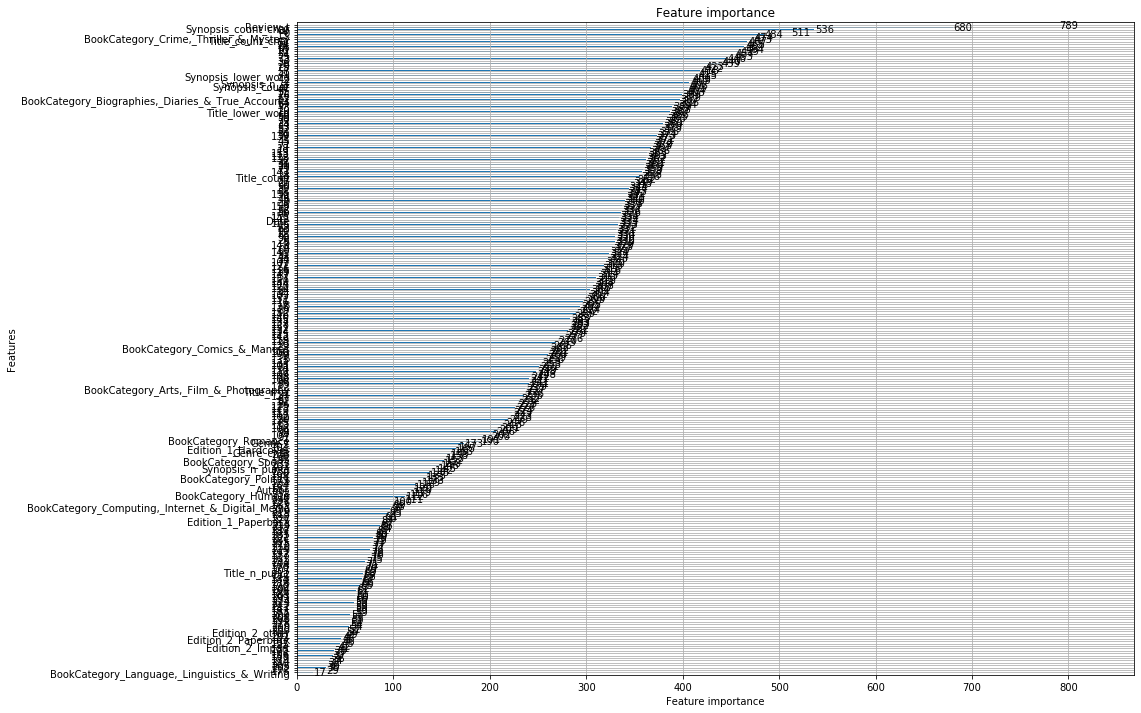

In [91]:
fig, ax  = plt.subplots(1,1, figsize=(15,12))
lgb.plot_importance(model, ax= ax)

In [92]:
test_lgb_1 = np.exp(test_lgb)-1
test_xgb_1 = np.exp(test_xgb)-1

In [286]:
answer1 = np.mean(test_xgb_1, axis = 1)

In [93]:
df = pd.concat([test_lgb_1, test_xgb_1], axis = 1)
answer1 = np.mean(df, axis = 1)

In [72]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=99)
rf.fit(train, train_label)
answer = rf.predict(test)

Wall time: 2min 43s


In [278]:
answer

array([485.72348, 986.83144, 499.44308, ..., 557.37162, 245.85934,
       890.7543 ])

In [624]:
sample.Price = np.exp(answer)-1

In [94]:
sample.Price = answer1.values

In [95]:
sample.to_excel('answer4.xlsx', index=False)

In [96]:
sample

,Price
0,527.760674
1,1013.790716
2,305.008787
3,1058.545719
4,382.269172
...,...
1555,1302.799250
1556,235.330380
1557,617.409892
1558,287.546594


In [183]:
pd.Series(rf.feature_importances_, index = train.columns)

NameError: name 'rf' is not defined

In [313]:
x

,0,1,2
0,5.777148,0.0,0.000000
1,0.000000,0.0,5.910837
2,5.912602,0.0,0.000000
3,5.640060,0.0,0.000000
4,5.920628,0.0,0.000000
...,...,...,...
6224,6.722651,0.0,0.000000
6225,0.000000,0.0,5.849282
6226,6.410926,0.0,0.000000
6227,5.705458,0.0,0.000000


In [630]:
(ntrain_xgb[0]

0       0.000000
1       0.000000
2       0.000000
3       5.405558
4       6.950172
          ...   
6224    6.043969
6225    0.000000
6226    5.796917
6227    0.000000
6228    0.000000
Name: 0, Length: 6229, dtype: float64

In [295]:
train_lgb

,0,1,2
0,0.000000,0.000000,5.386080
1,0.000000,0.000000,5.712294
2,0.000000,0.000000,5.803772
3,0.000000,5.364648,0.000000
4,7.100501,0.000000,0.000000
...,...,...,...
6198,0.000000,6.297189,0.000000
6199,0.000000,0.000000,5.829923
6200,0.000000,5.687904,0.000000
6201,0.000000,0.000000,5.743549
